## **Fase 2 - Transform**

*En esta fase del proceso ETL, nos centramos en transformar los datos extraídos para adecuarlos para el análisis posterior. La transformación incluye la limpieza de datos, conversión de tipos de datos y creación de nuevas columnas relevantes. Estas acciones permiten mejorar la calidad y la utilidad de los datos, facilitando un análisis más preciso y efectivo. La transformación asegura que los datos estén en un formato coherente y listo para ser utilizado y analizado con gráficos de visualización para entender cómo se correlacionan las columnas y poder identificar patrones en los datos.*.

In [2]:
# ⁠General
import numpy as np
import pandas as pd
from datetime import datetime

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [3]:
df = pd.read_csv('df_sample_V2.csv')

In [4]:
df.head()

urls            timestamp  \
0  https://www.airbnb.es/rooms/961287943216806993...  2024-10-29 21:15:36   
1  https://www.airbnb.es/rooms/126009435831365996...  2024-10-29 21:15:36   
2  https://www.airbnb.es/rooms/121029592864834425...  2024-10-29 21:15:36   
3  https://www.airbnb.es/rooms/119269213083576009...  2024-10-29 21:15:36   
4  https://www.airbnb.es/rooms/120282846099520215...  2024-10-29 21:15:36   

             record_id                                             Titles  \
0   961287943216806993  Descubre nuestra habitación doble en el corazó...   
1  1260094358313659968  Me encanta viajar, compartir y conocer lugares...   
2  1210295928648344258  Cancelación gratuita antes del 3 nov. Si cance...   
3  1192692130835760091  Disfruta de la privacidad  de este alojamiento...   
4  1202828460995202150  Situado en pleno Barrio Gótico, en el corazón ...   

                Host_name                                     Property_types  \
0  Anfitrión: Green House           Habitación en hotel en Barcelona, España   
1  Anfitrión: Diana Maria      Alojamiento entero: loft en Barcelona, España   
2         Anfitrión: Vero                    Habitación en Barcelona, España   
3          Anfitrión: Ele   Habitación privada en: loft en Barcelona, España   
4     Anfitrión: Cristian  Alojamiento entero: apartamento en Barcelona, ...   

  Prices_per_night                             Check_ins  \
0             74 €         Llegada a partir de las 15:00   
1             73 €  Horario de llegada: de 15:00 a 22:00   
2             36 €  Horario de llegada: de 15:00 a 20:00   
3             58 €  Horario de llegada: de 14:00 a 21:00   
4             80 €         Llegada a partir de las 15:00   

                  Check_outs Cleaning_fees                      Location  \
0  Salida antes de las 11:00           NaN                           NaN   
1  Salida antes de las 11:00          28 €  Barcelona, Catalunya, España   
2  Salida antes de las 12:00          31 €  Barcelona, Catalunya, España   
3  Salida antes de las 12:00          20 €  Barcelona, Catalunya, España   
4  Salida antes de las 11:00          45 €  Barcelona, Catalunya, España   

  Ratings  Num_reviews    Viajeros    Dormitorios    Camas            Baños  \
0    4,48        201.0  2 viajeros   1 dormitorio  2 camas        1,5 baños   
1   Nuevo          NaN  3 viajeros   1 dormitorio  2 camas           1 baño   
2   Nuevo          NaN         NaN            NaN   1 cama  Baño compartido   
3     5,0          4.0   1 viajero   1 dormitorio  2 camas   1 baño privado   
4    4,75          4.0  4 viajeros  2 dormitorios  2 camas           1 baño   

   Maximum_guests Otros  
0               2   NaN  
1               3   NaN  
2               1   NaN  
3               1   NaN  
4               4   NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   urls              50 non-null     object 
 1   timestamp         50 non-null     object 
 2   record_id         50 non-null     int64  
 3   Titles            50 non-null     object 
 4   Host_name         50 non-null     object 
 5   Property_types    50 non-null     object 
 6   Prices_per_night  46 non-null     object 
 7   Check_ins         50 non-null     object 
 8   Check_outs        50 non-null     object 
 9   Cleaning_fees     40 non-null     object 
 10  Location          37 non-null     object 
 11  Ratings           50 non-null     object 
 12  Num_reviews       23 non-null     float64
 13  Viajeros          29 non-null     object 
 14  Dormitorios       30 non-null     object 
 15  Camas             49 non-null     object 
 16  Baños             49 non-null     object 
 17 

In [6]:
df.describe()

record_id  Num_reviews  Maximum_guests
count  5.000000e+01    23.000000       50.000000
mean   8.913549e+17   265.956522        2.520000
std    4.993904e+17   603.807576        1.515094
min    9.790730e+05     3.000000        1.000000
25%    6.880769e+17     4.000000        1.250000
50%    1.165094e+18    27.000000        2.000000
75%    1.230737e+18   201.000000        3.750000
max    1.268819e+18  2752.000000        8.000000

In [7]:
df.columns

Index(['urls', 'timestamp', 'record_id', 'Titles', 'Host_name',
       'Property_types', 'Prices_per_night', 'Check_ins', 'Check_outs',
       'Cleaning_fees', 'Location', 'Ratings', 'Num_reviews', 'Viajeros',
       'Dormitorios', 'Camas', 'Baños', 'Maximum_guests', 'Otros'],
      dtype='object')

In [8]:
df.isna().sum()

urls                 0
timestamp            0
record_id            0
Titles               0
Host_name            0
Property_types       0
Prices_per_night     4
Check_ins            0
Check_outs           0
Cleaning_fees       10
Location            13
Ratings              0
Num_reviews         27
Viajeros            21
Dormitorios         20
Camas                1
Baños                1
Maximum_guests       0
Otros               49
dtype: int64

In [9]:
### Drop de columnas repetidas
df = df.drop('Viajeros', axis = 1 )
df = df.drop('Otros', axis = 1 )

### Host_name

In [11]:
df['Host_name'].unique()

array(['Anfitrión: Green House', 'Anfitrión: Diana Maria',
       'Anfitrión: Vero', 'Anfitrión: Ele', 'Anfitrión: Cristian',
       'Quédate con Marina', 'Quédate con Guido', 'Anfitrión: Carmen',
       'Anfitrión: Kristina', 'Anfitrión: Unite Hostel',
       'Anfitrión: Raffaele', 'Anfitrión: Ashley', 'Anfitrión: Valerie',
       'Anfitrión: David Nicolas', 'Anfitrión: Kiko',
       'Anfitrión: Lorenzo And  Cristina',
       'Quédate con Jesus Maximiliano', 'Quédate con Magdalena',
       'Anfitrión: Gia', 'Quédate con Jose David', 'Anfitrión: Georgina',
       'Anfitrión: Roberto', 'Anfitrión: Som Nit Triomf',
       'Anfitrión: Angeles', 'Quédate con Kristina',
       'Anfitrión: Fontanella', 'Anfitrión: Fernando', 'Anfitrión: Vivi',
       'Anfitrión: Natalia', 'Anfitrión: Joseph', 'Quédate con Andrea',
       'Quédate con Bienvenida', 'Quédate con Emmanuela Agbebi',
       'Quédate con Fabio', 'Quédate con Juan Carlos',
       'Quédate con Alejandro', 'Anfitrión: Vhan', 'Anfitrió

In [12]:
# Extraer solo el nombre del anfitrión, removendo "Anfitrión: " y cualquier outro prefixo
df['Host_name'] = df['Host_name'].str.replace('Anfitrión: ', '', regex=False).str.replace('Quédate con ', '', regex=False)

### Property_Types

In [14]:
# Definir una funcion para formatear y limpiar la columna Propoerty_Types
def category_types(value):
    if "Alojamiento entero" in value:
        return "Alojamiento entero"
    elif "Habitación" in value:
        return "Habitación"
    else:
        return "otro"

In [15]:
df["Property_types"] = df["Property_types"].apply(category_types)


In [16]:
df.head()

urls            timestamp  \
0  https://www.airbnb.es/rooms/961287943216806993...  2024-10-29 21:15:36   
1  https://www.airbnb.es/rooms/126009435831365996...  2024-10-29 21:15:36   
2  https://www.airbnb.es/rooms/121029592864834425...  2024-10-29 21:15:36   
3  https://www.airbnb.es/rooms/119269213083576009...  2024-10-29 21:15:36   
4  https://www.airbnb.es/rooms/120282846099520215...  2024-10-29 21:15:36   

             record_id                                             Titles  \
0   961287943216806993  Descubre nuestra habitación doble en el corazó...   
1  1260094358313659968  Me encanta viajar, compartir y conocer lugares...   
2  1210295928648344258  Cancelación gratuita antes del 3 nov. Si cance...   
3  1192692130835760091  Disfruta de la privacidad  de este alojamiento...   
4  1202828460995202150  Situado en pleno Barrio Gótico, en el corazón ...   

     Host_name      Property_types Prices_per_night  \
0  Green House          Habitación             74 €   
1  Diana Maria  Alojamiento entero             73 €   
2         Vero          Habitación             36 €   
3          Ele          Habitación             58 €   
4     Cristian  Alojamiento entero             80 €   

                              Check_ins                 Check_outs  \
0         Llegada a partir de las 15:00  Salida antes de las 11:00   
1  Horario de llegada: de 15:00 a 22:00  Salida antes de las 11:00   
2  Horario de llegada: de 15:00 a 20:00  Salida antes de las 12:00   
3  Horario de llegada: de 14:00 a 21:00  Salida antes de las 12:00   
4         Llegada a partir de las 15:00  Salida antes de las 11:00   

  Cleaning_fees                      Location Ratings  Num_reviews  \
0           NaN                           NaN    4,48        201.0   
1          28 €  Barcelona, Catalunya, España   Nuevo          NaN   
2          31 €  Barcelona, Catalunya, España   Nuevo          NaN   
3          20 €  Barcelona, Catalunya, España     5,0          4.0   
4          45 €  Barcelona, Catalunya, España    4,75          4.0   

     Dormitorios    Camas            Baños  Maximum_guests  
0   1 dormitorio  2 camas        1,5 baños               2  
1   1 dormitorio  2 camas           1 baño               3  
2            NaN   1 cama  Baño compartido               1  
3   1 dormitorio  2 camas   1 baño privado               1  
4  2 dormitorios  2 camas           1 baño               4

In [17]:
df.isna().sum()

urls                 0
timestamp            0
record_id            0
Titles               0
Host_name            0
Property_types       0
Prices_per_night     4
Check_ins            0
Check_outs           0
Cleaning_fees       10
Location            13
Ratings              0
Num_reviews         27
Dormitorios         20
Camas                1
Baños                1
Maximum_guests       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   urls              50 non-null     object 
 1   timestamp         50 non-null     object 
 2   record_id         50 non-null     int64  
 3   Titles            50 non-null     object 
 4   Host_name         50 non-null     object 
 5   Property_types    50 non-null     object 
 6   Prices_per_night  46 non-null     object 
 7   Check_ins         50 non-null     object 
 8   Check_outs        50 non-null     object 
 9   Cleaning_fees     40 non-null     object 
 10  Location          37 non-null     object 
 11  Ratings           50 non-null     object 
 12  Num_reviews       23 non-null     float64
 13  Dormitorios       30 non-null     object 
 14  Camas             49 non-null     object 
 15  Baños             49 non-null     object 
 16  Maximum_guests    50 non-null     int64  
dtyp

### Prices

In [20]:
# Remover el símbolo del euro y convertir a valores numéricos, sustituyendo valores no válidos por 0
df['Prices_per_night'] = pd.to_numeric(df['Prices_per_night'].str.replace('€', '').str.strip(), errors='coerce')

# Yo usaria esto en lugar de rellenar los nan con 0 y aque es nuestra target 
df = df.dropna(subset=['Prices_per_night'])
#Y luego ya se hace lo del .astype()

### Cleaning Fee

In [22]:
df['Cleaning_fees'] = pd.to_numeric(df['Cleaning_fees'].str.replace('€', '').str.strip(), errors='coerce') #.fillna(0)

In [23]:
df.head()

urls            timestamp  \
0  https://www.airbnb.es/rooms/961287943216806993...  2024-10-29 21:15:36   
1  https://www.airbnb.es/rooms/126009435831365996...  2024-10-29 21:15:36   
2  https://www.airbnb.es/rooms/121029592864834425...  2024-10-29 21:15:36   
3  https://www.airbnb.es/rooms/119269213083576009...  2024-10-29 21:15:36   
4  https://www.airbnb.es/rooms/120282846099520215...  2024-10-29 21:15:36   

             record_id                                             Titles  \
0   961287943216806993  Descubre nuestra habitación doble en el corazó...   
1  1260094358313659968  Me encanta viajar, compartir y conocer lugares...   
2  1210295928648344258  Cancelación gratuita antes del 3 nov. Si cance...   
3  1192692130835760091  Disfruta de la privacidad  de este alojamiento...   
4  1202828460995202150  Situado en pleno Barrio Gótico, en el corazón ...   

     Host_name      Property_types  Prices_per_night  \
0  Green House          Habitación              74.0   
1  Diana Maria  Alojamiento entero              73.0   
2         Vero          Habitación              36.0   
3          Ele          Habitación              58.0   
4     Cristian  Alojamiento entero              80.0   

                              Check_ins                 Check_outs  \
0         Llegada a partir de las 15:00  Salida antes de las 11:00   
1  Horario de llegada: de 15:00 a 22:00  Salida antes de las 11:00   
2  Horario de llegada: de 15:00 a 20:00  Salida antes de las 12:00   
3  Horario de llegada: de 14:00 a 21:00  Salida antes de las 12:00   
4         Llegada a partir de las 15:00  Salida antes de las 11:00   

   Cleaning_fees                      Location Ratings  Num_reviews  \
0            NaN                           NaN    4,48        201.0   
1           28.0  Barcelona, Catalunya, España   Nuevo          NaN   
2           31.0  Barcelona, Catalunya, España   Nuevo          NaN   
3           20.0  Barcelona, Catalunya, España     5,0          4.0   
4           45.0  Barcelona, Catalunya, España    4,75          4.0   

     Dormitorios    Camas            Baños  Maximum_guests  
0   1 dormitorio  2 camas        1,5 baños               2  
1   1 dormitorio  2 camas           1 baño               3  
2            NaN   1 cama  Baño compartido               1  
3   1 dormitorio  2 camas   1 baño privado               1  
4  2 dormitorios  2 camas           1 baño               4

In [24]:
df['Titles'].unique() # Se tiene que modificar - hay localizaciones con otros caminos - cambiar codigo en el ETL 1 - Fase 1

array(['Descubre nuestra habitación doble en el corazón del emblemático barrio del Eixample de Barcelona. Diseñada para mayor comodidad y conveniencia, esta espaciosa habitación cuenta con dos camas separadas, lo que garantiza la privacidad de cada huésped. Los servicios modernos incluyen TV inteligente, mininevera y caja fuerte para proteger tus objetos de valor. Deléitate con el lujo de un baño privado equipado con accesorios de primera calidad. Nuestra ubicación privilegiada está a solo 15 minutos a pie de la majestuosa Sagrada Familia y a solo 5 minutos a pie de la Estación del Norte.El espacioLa habitación tiene 3 camas individuales, baño privado, TV inteligente, mininevera y una caja fuerte. Se proporcionan las toallas y los aseos, así como las sábanas. La habitación tiene una ventana interior, que no se puede abrir.Servicios y zonas comunesLa recepción del hotel está abierta de 07:00 a 23:00. Los huéspedes podrán disfrutar en nuestro vestíbulo. Para acceder a la segunda planta d

### Ratings

In [26]:
# Sustituir valores "Nuevo" y "Sin evaluaciones" por 0
df['Ratings'] = df['Ratings'].replace({'Nuevo': '0', 'Sin evaluaciones': '0'})

# Eliminar comas y convertir a numérico
df['Ratings'] = pd.to_numeric(df['Ratings'].str.replace(',', '.'), errors='coerce').fillna(0)
df['Ratings']


0     4.48
1     0.00
2     0.00
3     5.00
4     4.75
5     5.00
6     4.75
7     0.00
8     0.00
9     4.47
11    0.00
12    4.74
13    5.00
14    0.00
15    0.00
16    0.00
17    4.91
18    4.93
20    4.67
21    4.75
22    0.00
23    4.51
25    4.49
26    4.91
27    0.00
28    0.00
29    4.69
30    4.48
31    4.66
32    4.91
33    5.00
34    4.54
36    4.94
37    4.94
38    0.00
39    4.89
40    0.00
41    4.76
42    0.00
43    0.00
44    0.00
45    0.00
46    5.00
47    4.91
48    4.74
49    3.79
Name: Ratings, dtype: float64

### Number of Reviews

In [28]:
# Convertir a numérico y reemplazar errores con 0
df['Num_reviews'] = pd.to_numeric(df['Num_reviews'], errors='coerce').fillna(0)

# Convertir a entero
#df['Num_reviews'] = df['Num_reviews'].astype(int)

### Dormitorios

In [30]:
df['Dormitorios'].unique()

array(['1 dormitorio', nan, '2 dormitorios', '4 dormitorios',
       '3 dormitorios'], dtype=object)

In [31]:
# Extraer solo el número de dormitorios
df['Dormitorios'] = df['Dormitorios'].str.extract('(\d+)')[0]

# Convertir a numérico y reemplazar NaN por 0
df['Dormitorios'] = pd.to_numeric(df['Dormitorios'], errors='coerce')#.fillna(0).astype(int)


### Camas

In [33]:
df['Camas'].unique()

array(['2 camas', '1 cama', '1 cama individual', '3 camas', '4 camas',
       '1 cama de matrimonio', nan, '2 camas individuales'], dtype=object)

In [34]:
# Extraer solo el número de camas
df['Camas'] = df['Camas'].str.extract('(\d+)')[0]

# Convertir a numérico y reemplazar NaN por 0
df['Camas'] = pd.to_numeric(df['Camas'], errors='coerce')#.fillna(0).astype(int)



### Baños

In [36]:
df['Baños'].unique()

array(['1,5 baños', '1 baño', 'Baño compartido', '1 baño privado',
       '2 baños', 'Baño privado en el alojamiento', nan], dtype=object)

In [37]:
# Reemplazar "Baño compartido" por 0.5 y "Baño privado" por 1
df['Baños'] = df['Baños'].replace({'Baño compartido': 0.5, 'Baño privado': 1})

# Extraer números y reemplazar NaN por 0
df['Baños'] = df['Baños'].str.extract('(\d+[.,]?\d*)')[0]

# Convertir a numérico y reemplazar NaN por 0
df['Baños'] = pd.to_numeric(df['Baños'].str.replace(',', '.'), errors='coerce')#.fillna(0)

In [38]:
df.head()

urls            timestamp  \
0  https://www.airbnb.es/rooms/961287943216806993...  2024-10-29 21:15:36   
1  https://www.airbnb.es/rooms/126009435831365996...  2024-10-29 21:15:36   
2  https://www.airbnb.es/rooms/121029592864834425...  2024-10-29 21:15:36   
3  https://www.airbnb.es/rooms/119269213083576009...  2024-10-29 21:15:36   
4  https://www.airbnb.es/rooms/120282846099520215...  2024-10-29 21:15:36   

             record_id                                             Titles  \
0   961287943216806993  Descubre nuestra habitación doble en el corazó...   
1  1260094358313659968  Me encanta viajar, compartir y conocer lugares...   
2  1210295928648344258  Cancelación gratuita antes del 3 nov. Si cance...   
3  1192692130835760091  Disfruta de la privacidad  de este alojamiento...   
4  1202828460995202150  Situado en pleno Barrio Gótico, en el corazón ...   

     Host_name      Property_types  Prices_per_night  \
0  Green House          Habitación              74.0   
1  Diana Maria  Alojamiento entero              73.0   
2         Vero          Habitación              36.0   
3          Ele          Habitación              58.0   
4     Cristian  Alojamiento entero              80.0   

                              Check_ins                 Check_outs  \
0         Llegada a partir de las 15:00  Salida antes de las 11:00   
1  Horario de llegada: de 15:00 a 22:00  Salida antes de las 11:00   
2  Horario de llegada: de 15:00 a 20:00  Salida antes de las 12:00   
3  Horario de llegada: de 14:00 a 21:00  Salida antes de las 12:00   
4         Llegada a partir de las 15:00  Salida antes de las 11:00   

   Cleaning_fees                      Location  Ratings  Num_reviews  \
0            NaN                           NaN     4.48        201.0   
1           28.0  Barcelona, Catalunya, España     0.00          0.0   
2           31.0  Barcelona, Catalunya, España     0.00          0.0   
3           20.0  Barcelona, Catalunya, España     5.00          4.0   
4           45.0  Barcelona, Catalunya, España     4.75          4.0   

   Dormitorios  Camas  Baños  Maximum_guests  
0          1.0    2.0    1.5               2  
1          1.0    2.0    1.0               3  
2          NaN    1.0    NaN               1  
3          1.0    2.0    1.0               1  
4          2.0    2.0    1.0               4

In [39]:
df.isna().sum()/df.shape[0]*100

urls                 0.000000
timestamp            0.000000
record_id            0.000000
Titles               0.000000
Host_name            0.000000
Property_types       0.000000
Prices_per_night     0.000000
Check_ins            0.000000
Check_outs           0.000000
Cleaning_fees       13.043478
Location            23.913043
Ratings              0.000000
Num_reviews          0.000000
Dormitorios         43.478261
Camas                2.173913
Baños               45.652174
Maximum_guests       0.000000
dtype: float64

In [40]:
df.isna().sum()

urls                 0
timestamp            0
record_id            0
Titles               0
Host_name            0
Property_types       0
Prices_per_night     0
Check_ins            0
Check_outs           0
Cleaning_fees        6
Location            11
Ratings              0
Num_reviews          0
Dormitorios         20
Camas                1
Baños               21
Maximum_guests       0
dtype: int64

In [41]:
df.to_csv('df_clean.csv', index=False)

# EDA

In [43]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score

Eliminamos columnas que no arrojan ninguna información valida.

In [45]:
# Filtrar columnas que no son necesarias para el EDA
df_filtered = df.drop(columns=['urls', 'timestamp', 'record_id','Titles'])

# Separar

In [47]:
def separar_columnas(df):
    columnas_categoricas = []
    columnas_continuas = []
    
    for columna in df.columns:
        if pd.api.types.is_numeric_dtype(df[columna]):
            columnas_continuas.append(columna)
        else:
            columnas_categoricas.append(columna)
    
    return columnas_categoricas, columnas_continuas

In [48]:
categoricas,continuas = separar_columnas(df_filtered)

# Categoricas

In [50]:
def eda_categoricas(columna, df, target="Prices_per_night", showfliers=True):
    # Gráfico de barras de conteo
    count_fig = px.histogram(df, x=columna, color=columna, title=f"Conteo de {columna}",
                             color_discrete_sequence=px.colors.qualitative.Pastel)

    # Gráfico de boxplot
    box_fig = go.Figure()
    for category in df[columna].unique():
        box_fig.add_trace(go.Box(
            y=df[df[columna] == category][target],
            name=str(category),
            boxpoints='outliers' if showfliers else False,
            marker_color=px.colors.qualitative.Pastel2[df[columna].unique().tolist().index(category) % len(px.colors.qualitative.Pastel2)]
        ))
    box_fig.update_layout(title=f"Boxplot de {target} por {columna}")

    # Mostrar gráficos
    count_fig.show()
    box_fig.show()


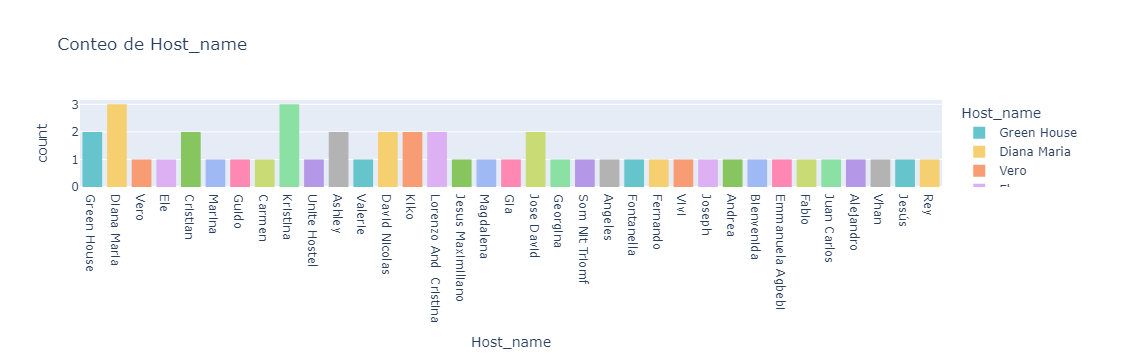

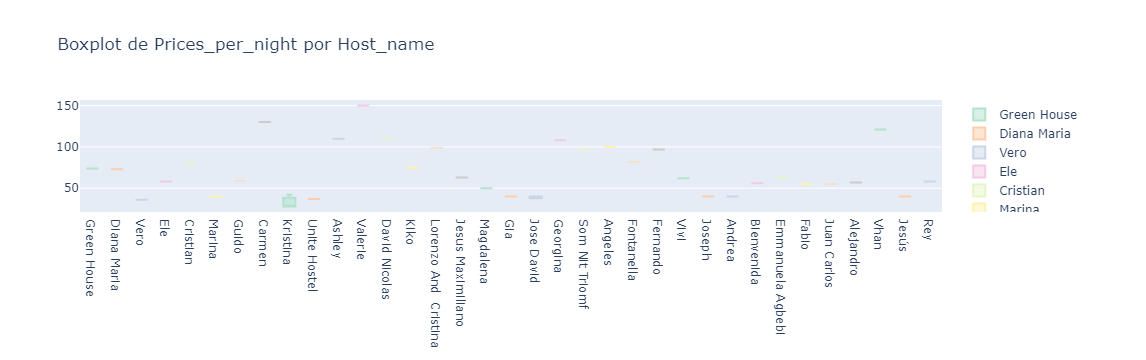

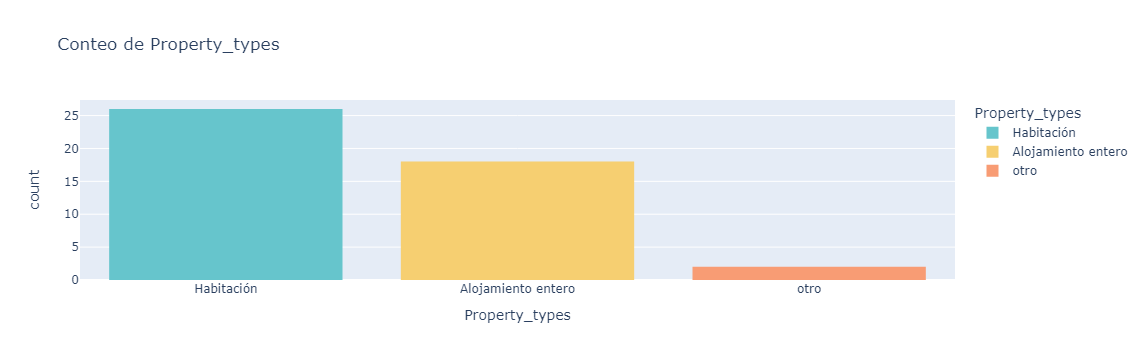

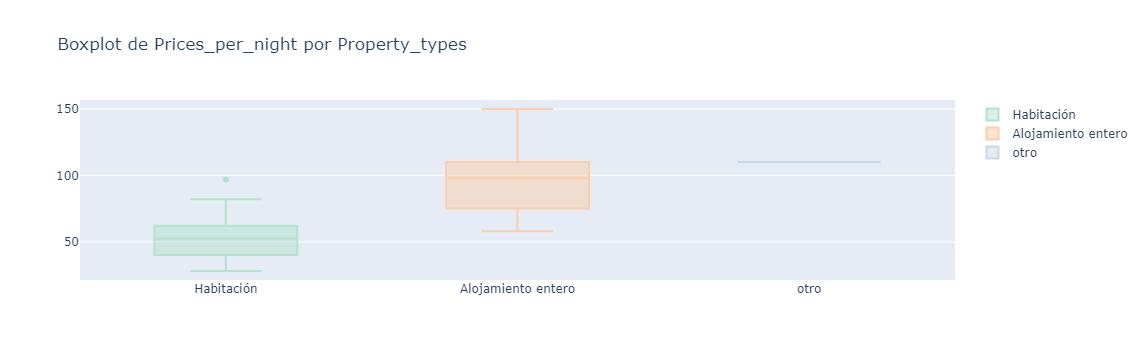

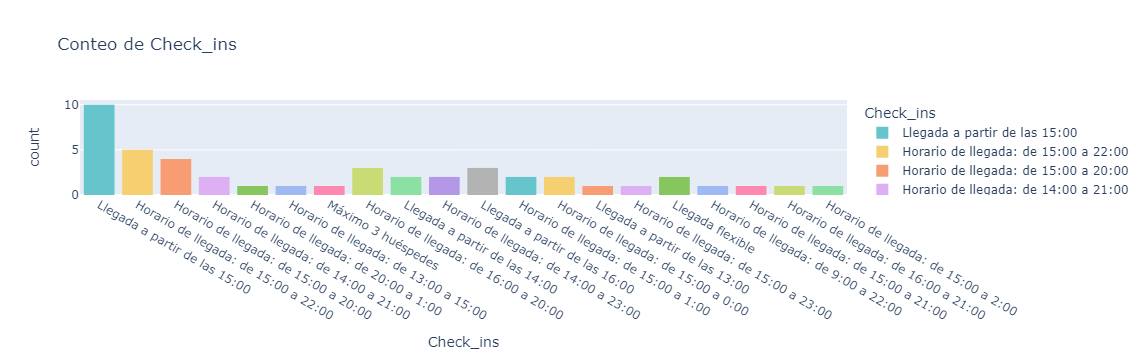

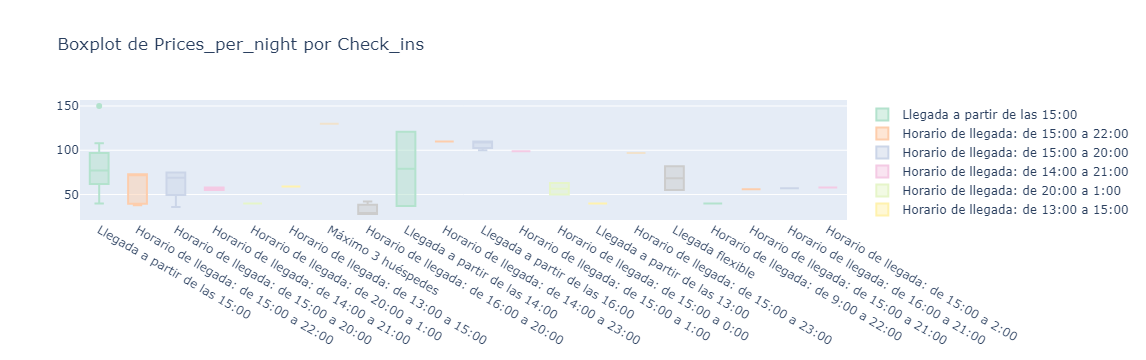

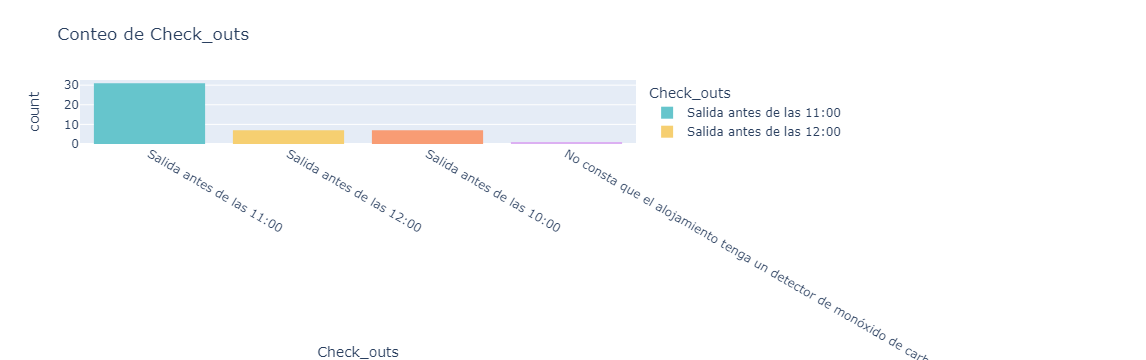

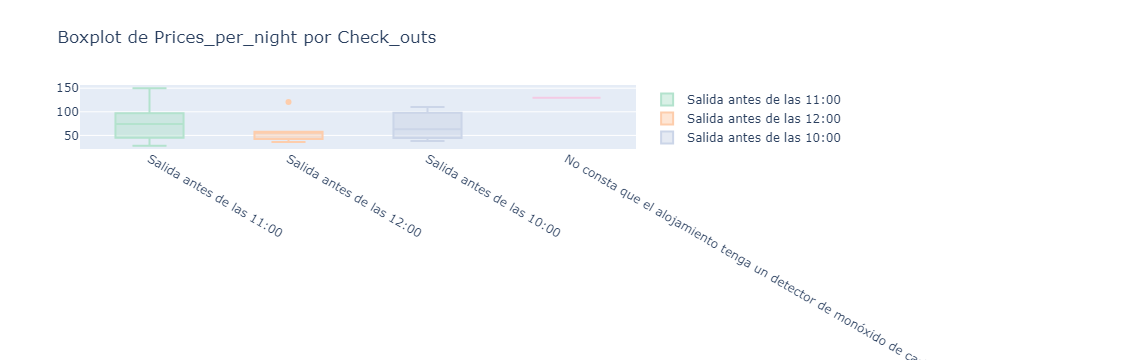

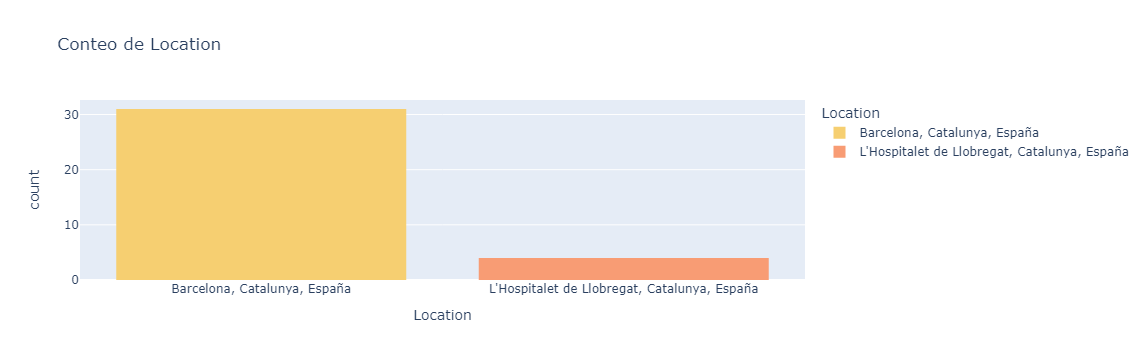

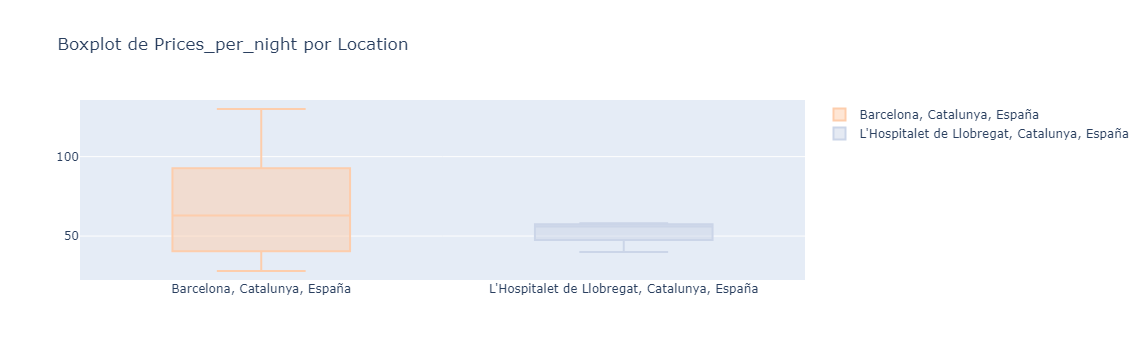

In [51]:
for columna in categoricas:
    eda_categoricas(columna = columna, df = df_filtered)
    

# Continuas

In [53]:
def eda_continuas(columna, df, target="Prices_per_night", showfliers=True):
    # Histograma con KDE
    hist_fig = px.histogram(df, x=columna, marginal="violin", opacity=0.7,color_discrete_sequence = px.colors.sequential.Viridis,
                            title=f"Histograma y KDE de {columna}")
    hist_fig.update_layout(showlegend=True)
    

    # Gráfico de dispersión
    scatter_fig = px.scatter(df, x=columna, y=target,color_discrete_sequence = px.colors.qualitative.Pastel,
                             title=f"Gráfico de dispersión de {target} por {columna}")

    
    # Boxplot
    box_fig = go.Figure()
    for category in df[columna].unique():
        if not pd.isna(category):
            
            box_fig.add_trace(go.Box(
                y=df[df[columna] == category][target],
                name=str(category),
                boxpoints='outliers' if showfliers else False,
                marker_color=px.colors.qualitative.Pastel2[df[columna].unique().tolist().index(category) % len(px.colors.qualitative.Pastel2)]
            ))

    # Mostrar gráficos
    hist_fig.show()
    scatter_fig.show()
    box_fig.show()

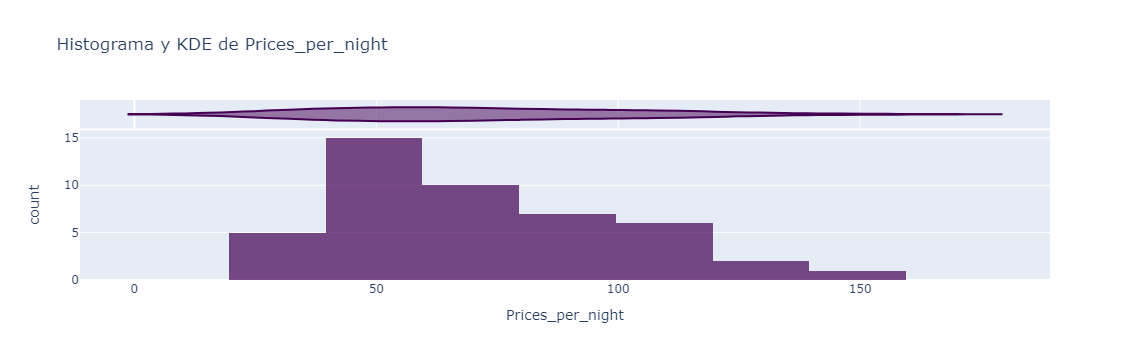

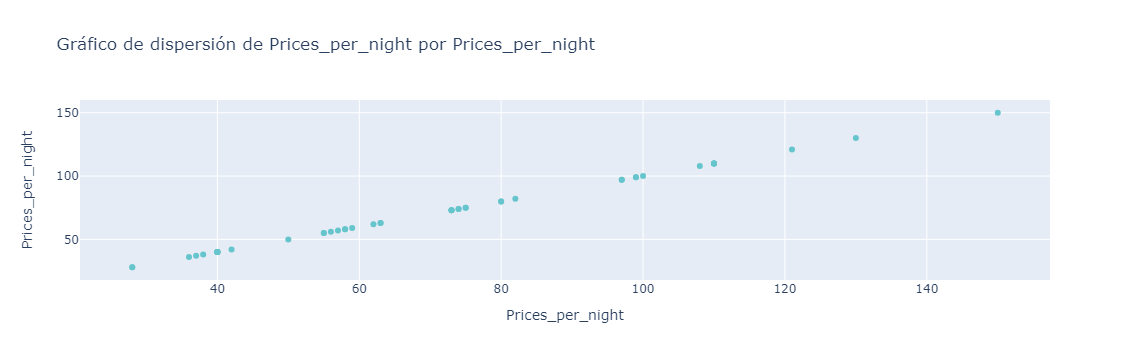

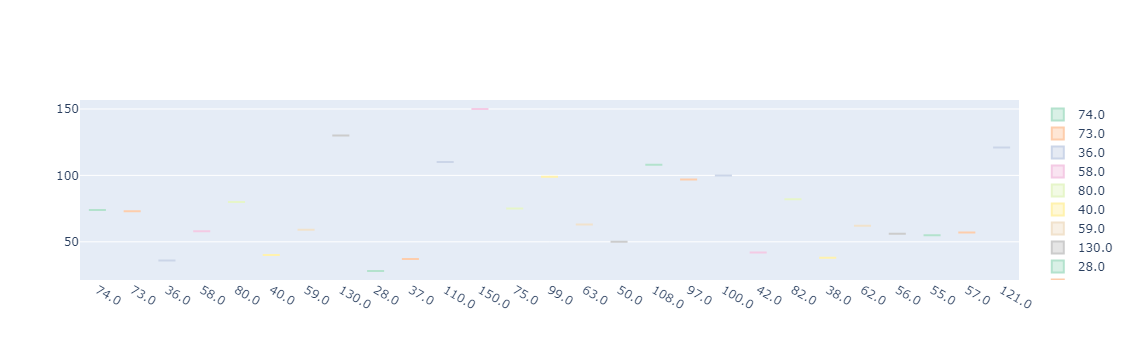

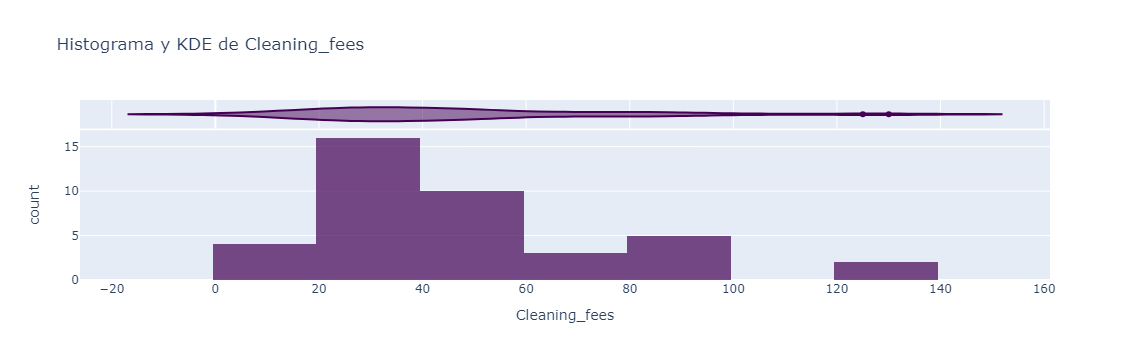

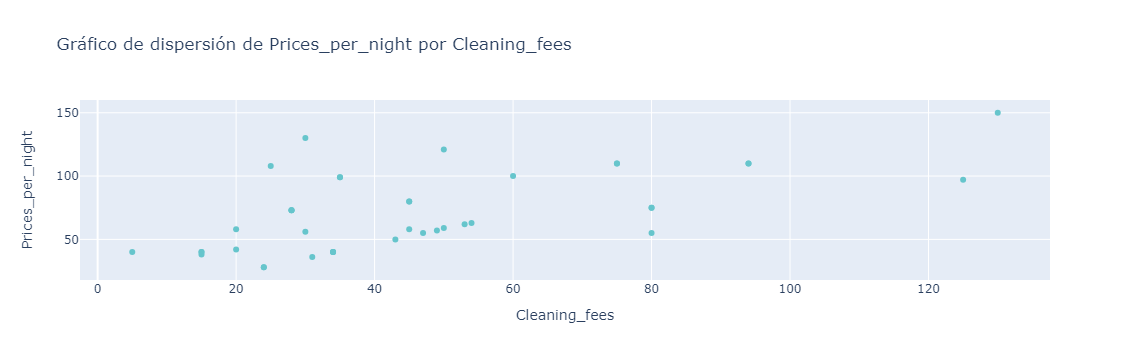

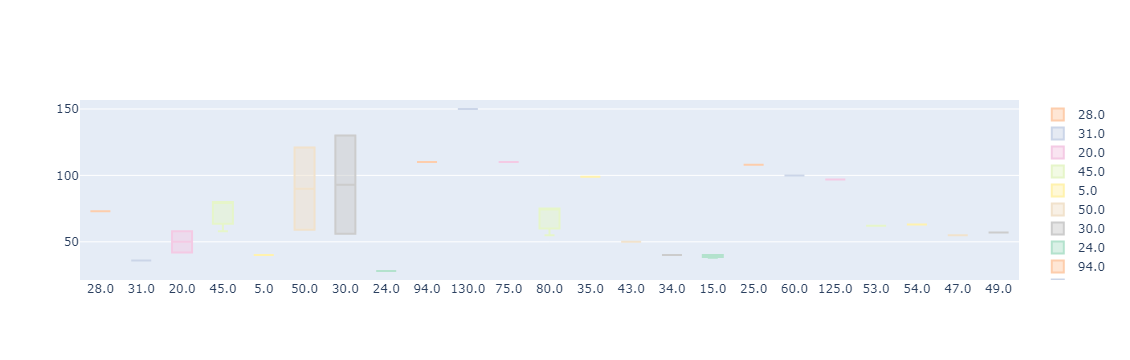

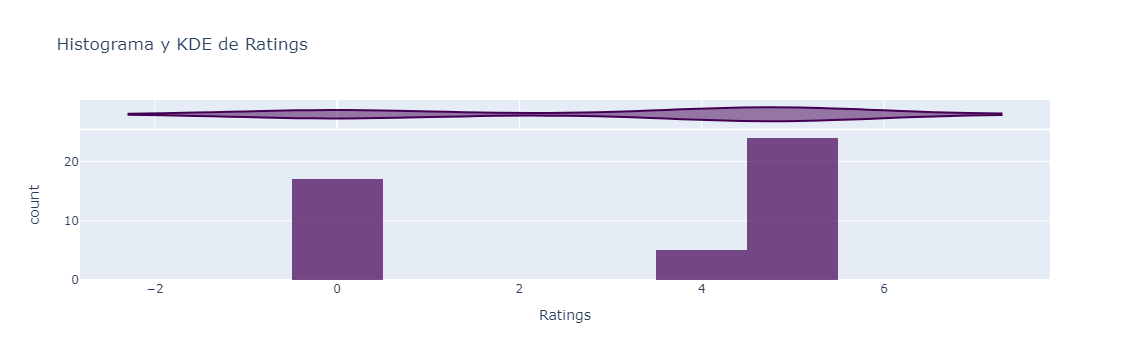

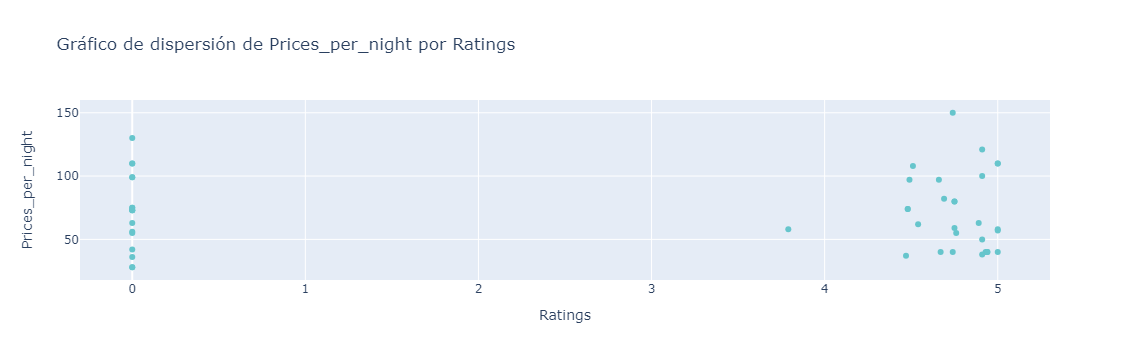

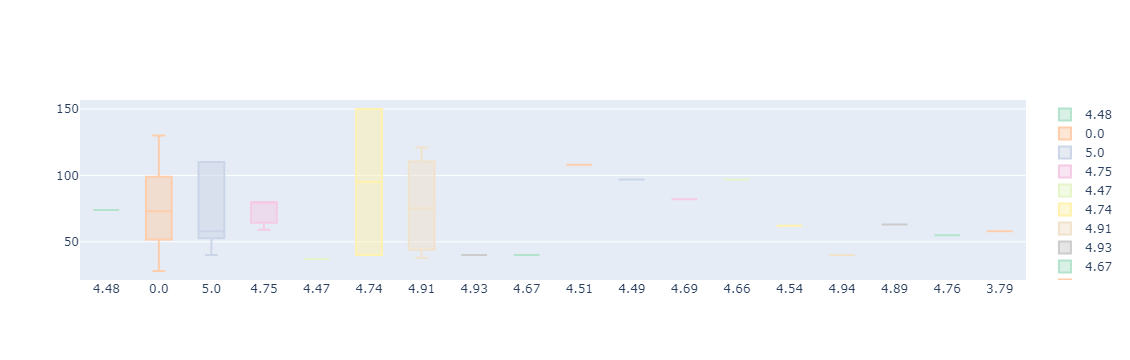

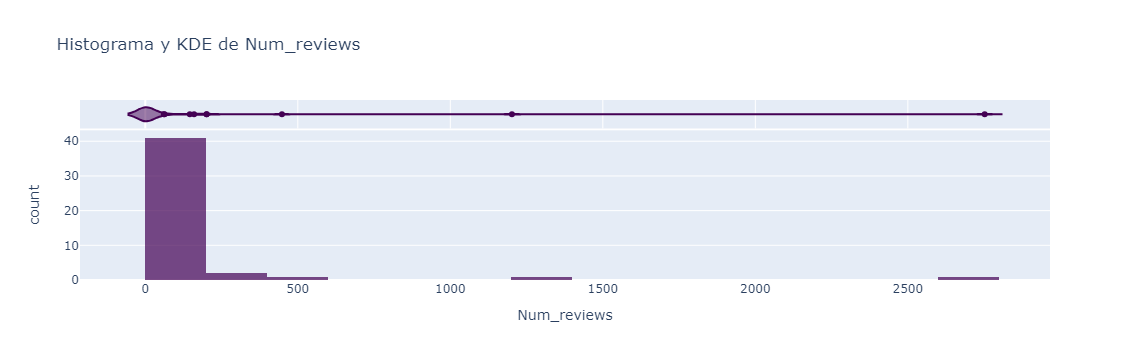

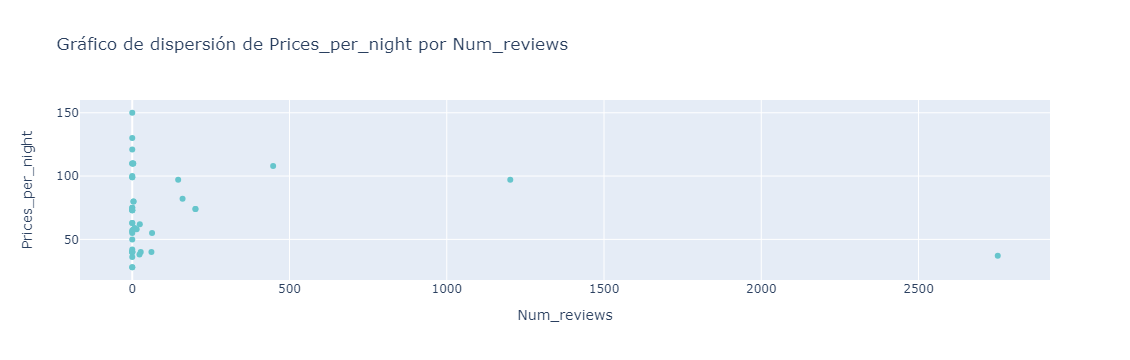

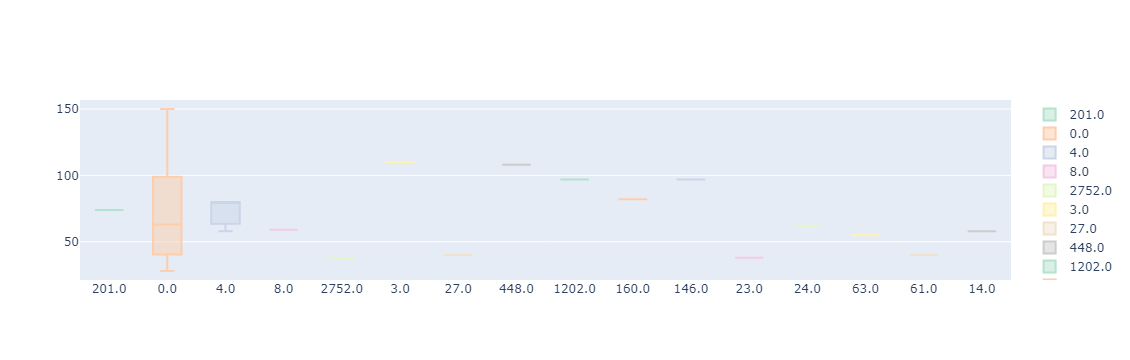

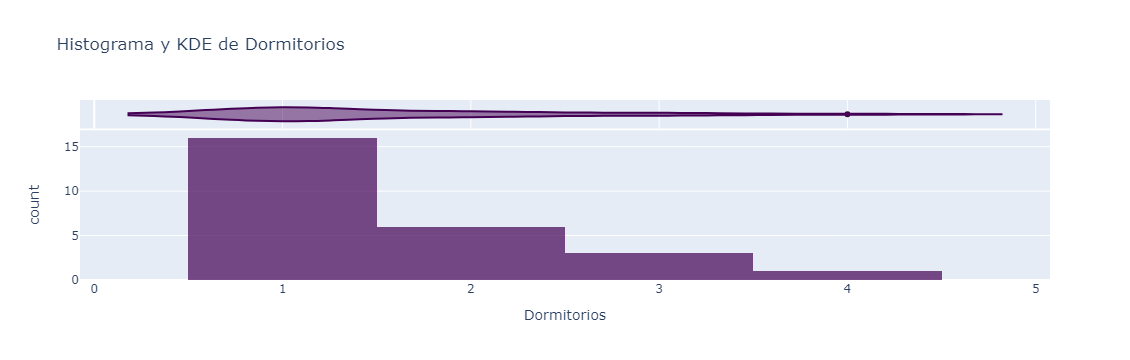

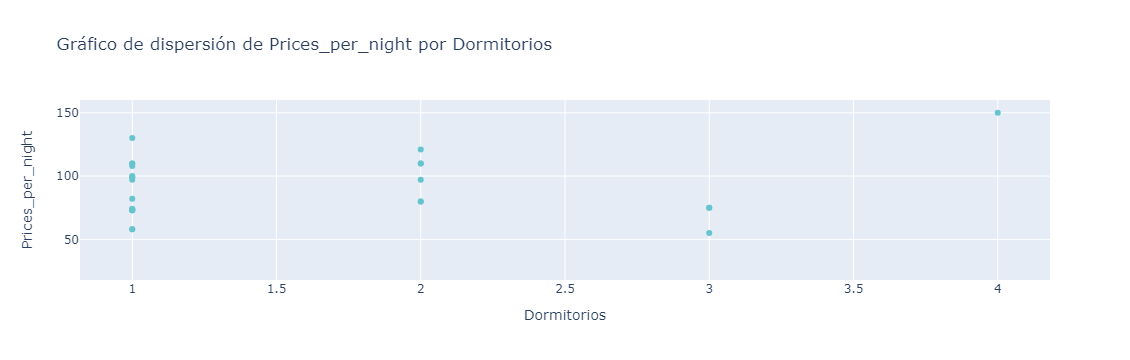

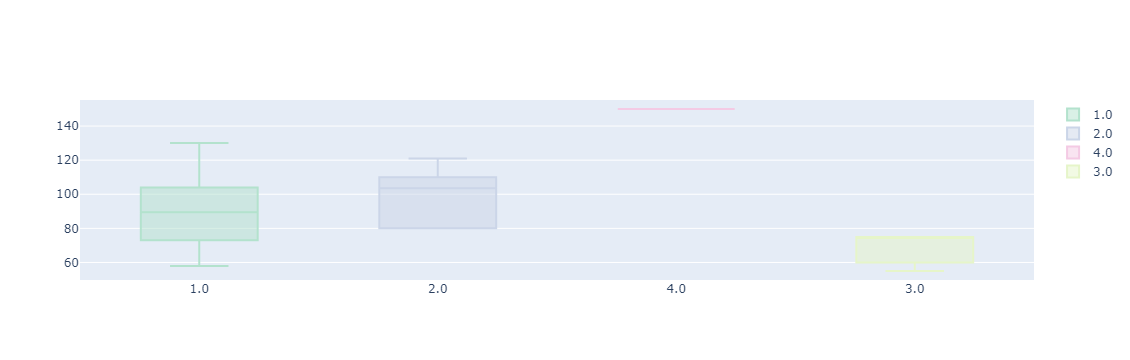

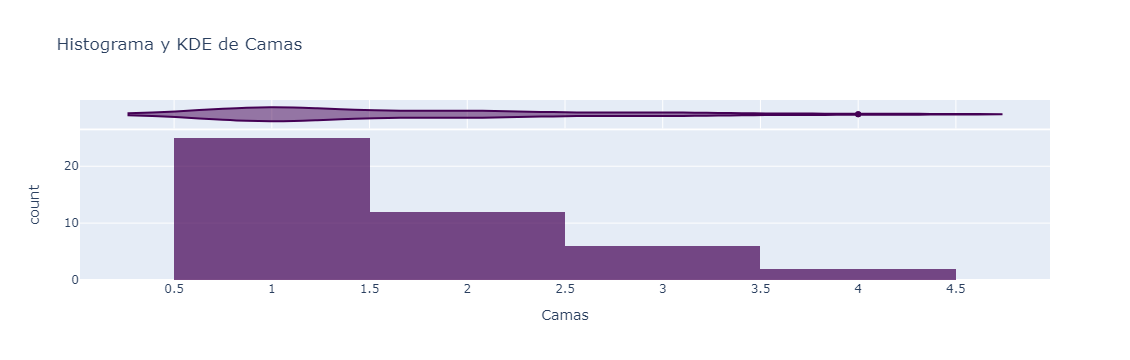

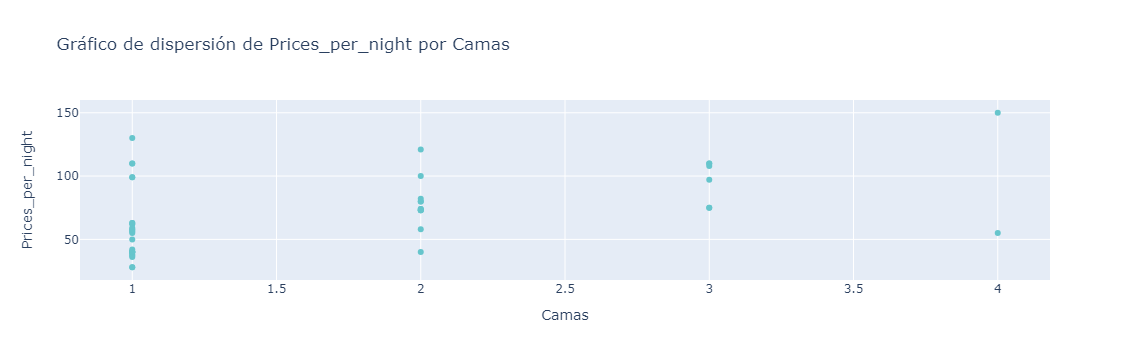

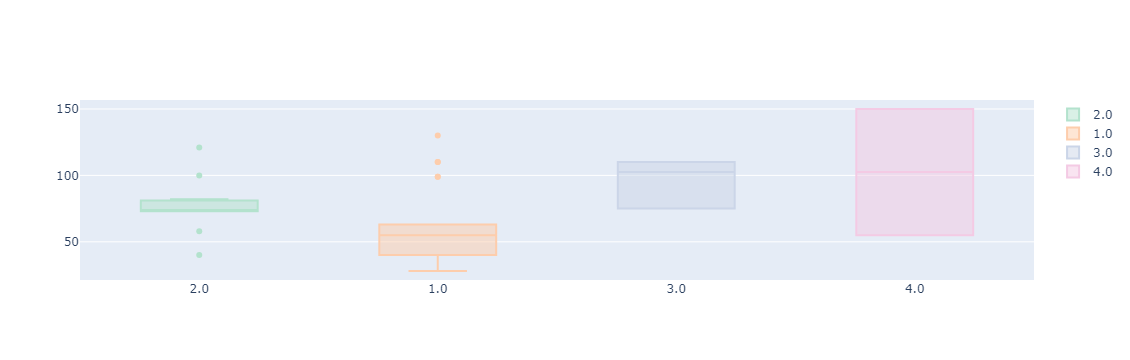

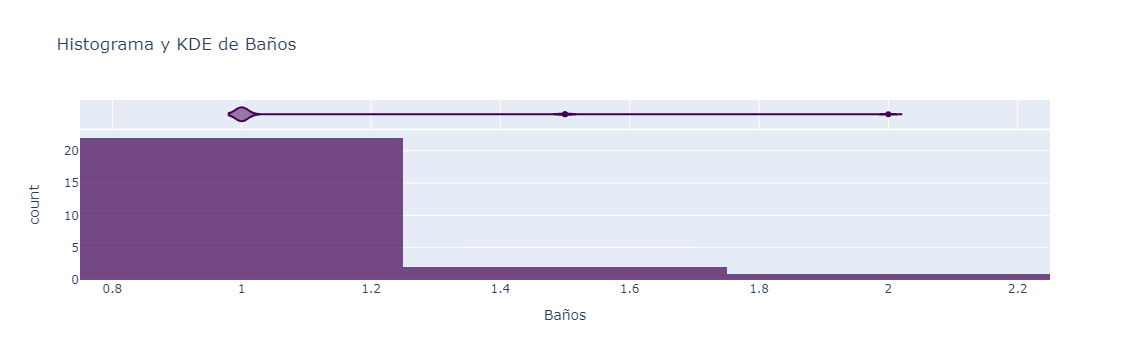

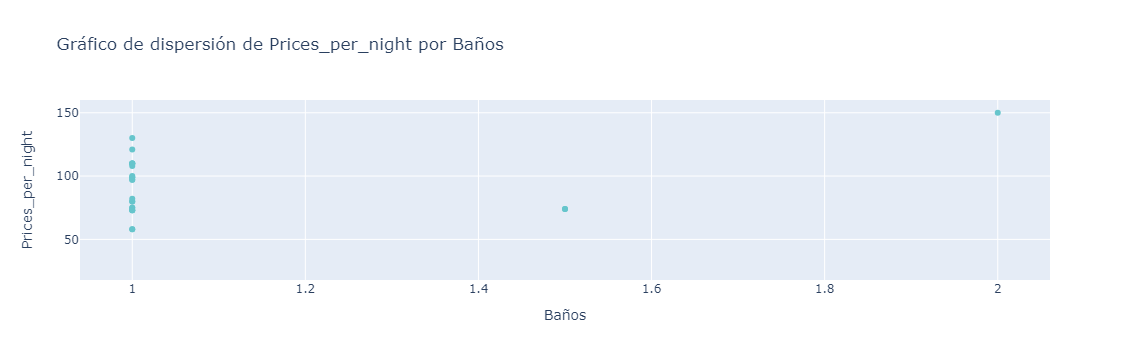

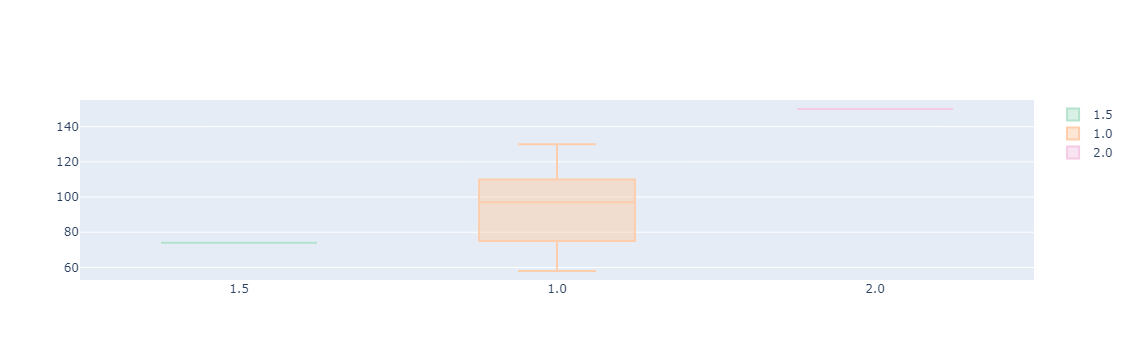

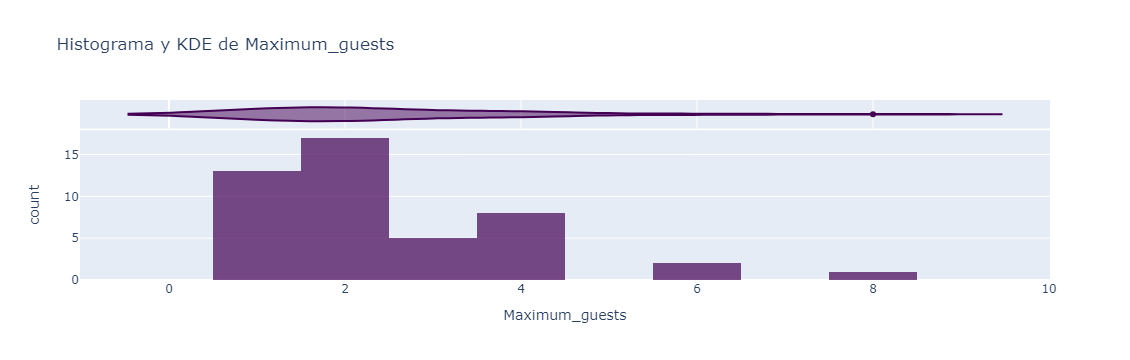

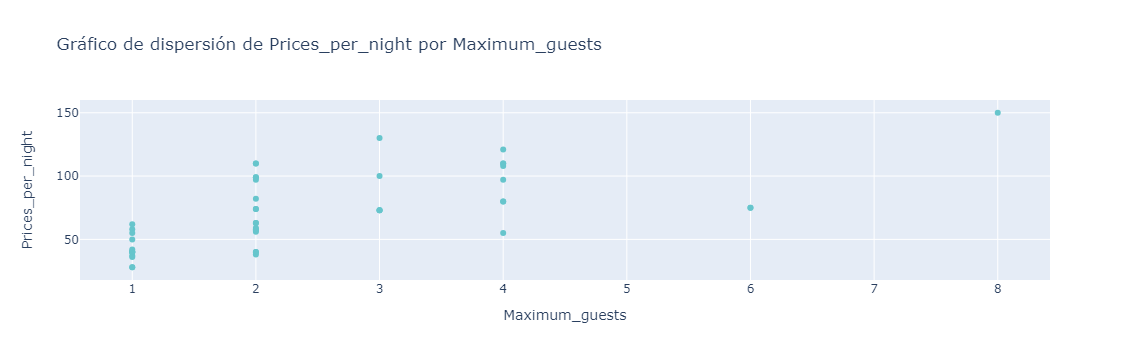

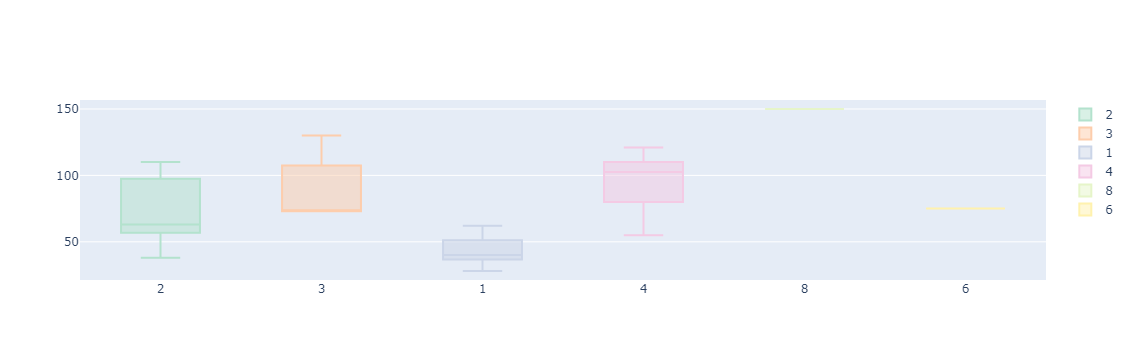

In [54]:
for columna in continuas:
    eda_continuas(columna = columna, df = df_filtered)

In [55]:
df.isna().sum()

urls                 0
timestamp            0
record_id            0
Titles               0
Host_name            0
Property_types       0
Prices_per_night     0
Check_ins            0
Check_outs           0
Cleaning_fees        6
Location            11
Ratings              0
Num_reviews          0
Dormitorios         20
Camas                1
Baños               21
Maximum_guests       0
dtype: int64

# Con log

In [57]:
def eda_continuas_log(columna, df, target="Prices_per_night", hue=None):
    # Aplicar transformación logarítmica a la columna
    df[f"log_{columna}"] = np.log1p(df[columna])
    
    # Histograma con KDE para la columna transformada
    hist_fig = px.histogram(df, x=f"log_{columna}", color=hue, marginal="violin", opacity=0.7,
                            title=f"Histograma y KDE de log({columna})")
    hist_fig.update_layout(showlegend=True)

    # Gráfico de dispersión para la columna transformada
    scatter_fig = px.scatter(df, x=f"log_{columna}", y=target, color=hue, 
                             title=f"Gráfico de dispersión de {target} por log({columna})")
    
    # Boxplot para la columna transformada
    box_fig = go.Figure()
    unique_hues = df[hue].unique() if hue else [None]
    
    for h in unique_hues:
        filtered_df = df[df[hue] == h] if hue else df
        box_fig.add_trace(go.Box(
            y=filtered_df[f"log_{columna}"],
            name=str(h) if h else f"log_{columna}",
            boxpoints="all"
        ))
    box_fig.update_layout(title=f"Boxplot de log({columna}) por {hue}" if hue else f"Boxplot de log({columna})")

    # Mostrar gráficos
    hist_fig.show()
    scatter_fig.show()
    box_fig.show()

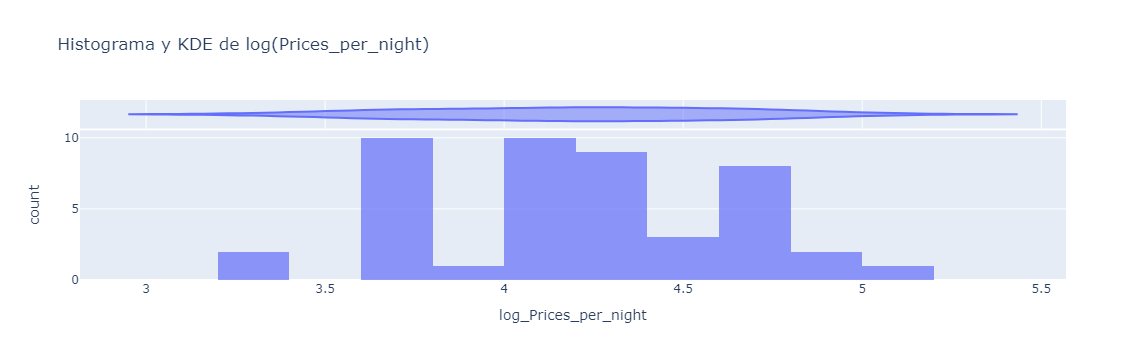

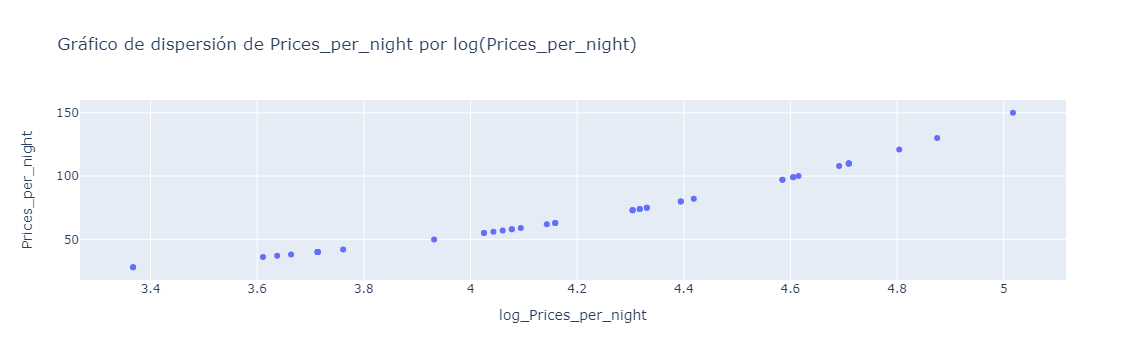

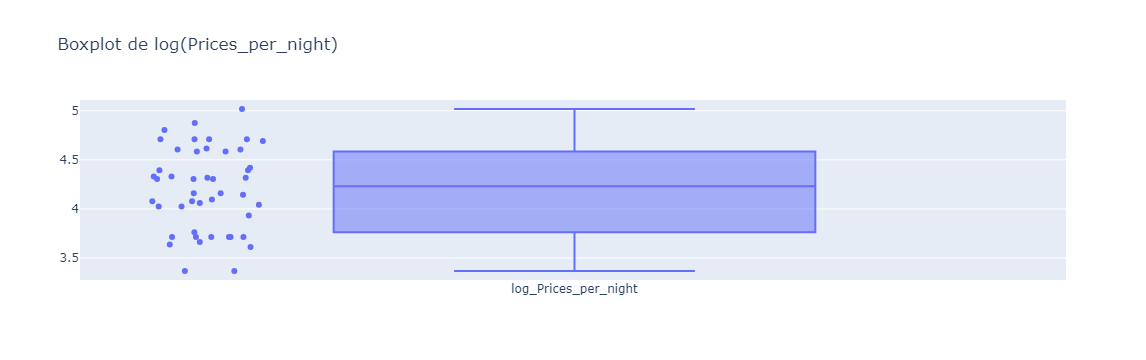

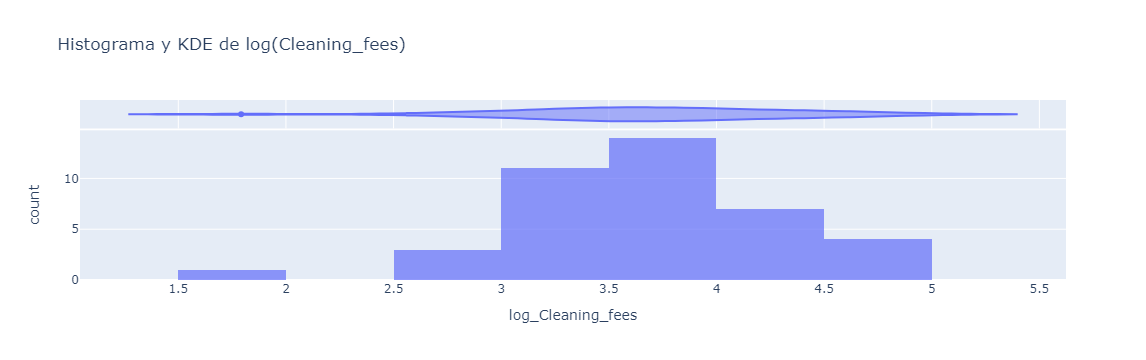

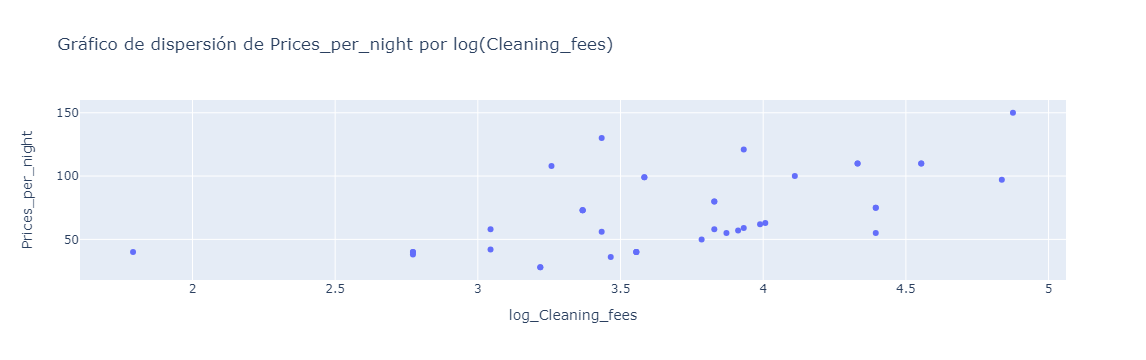

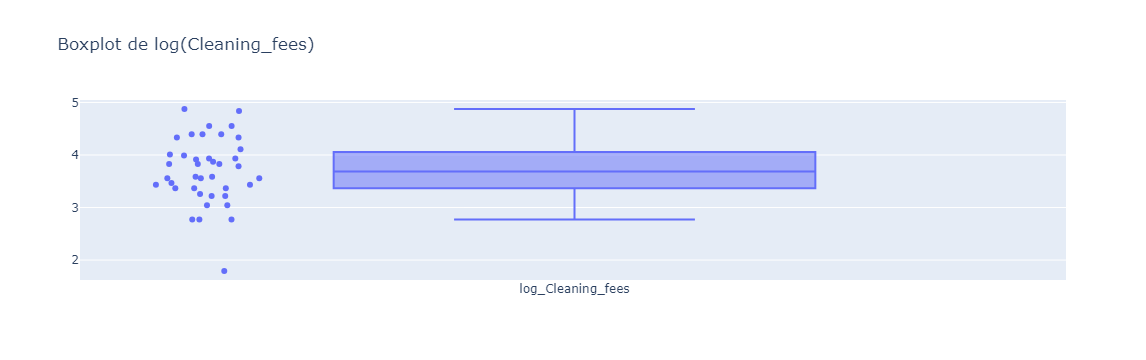

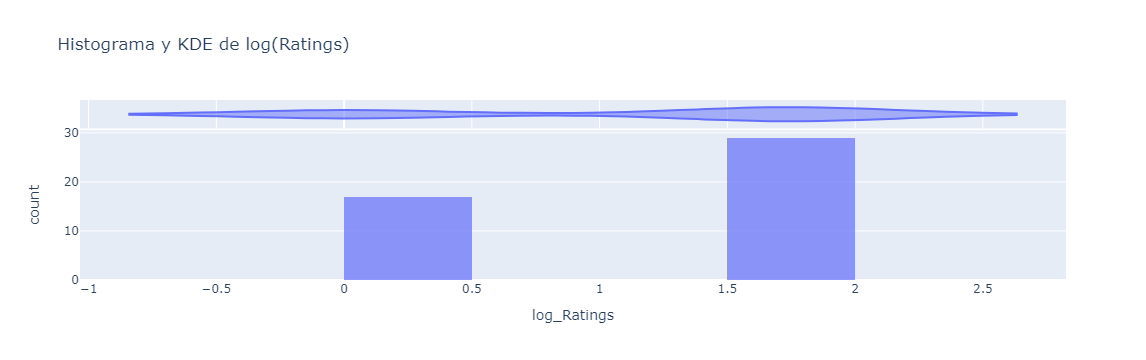

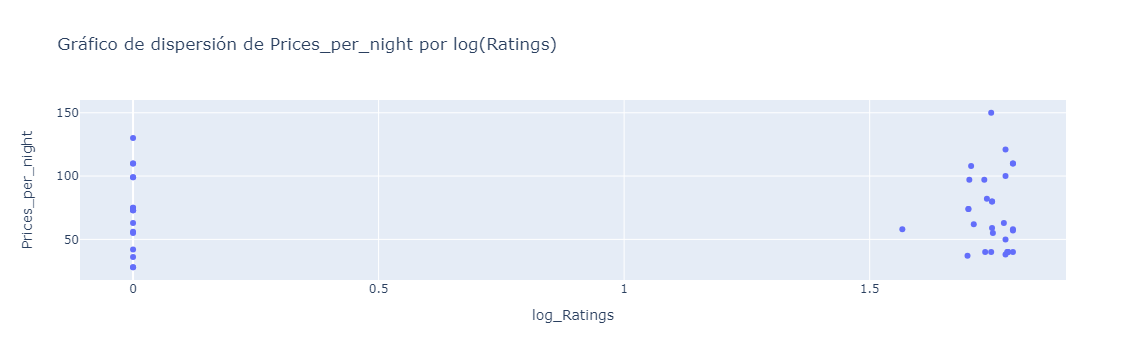

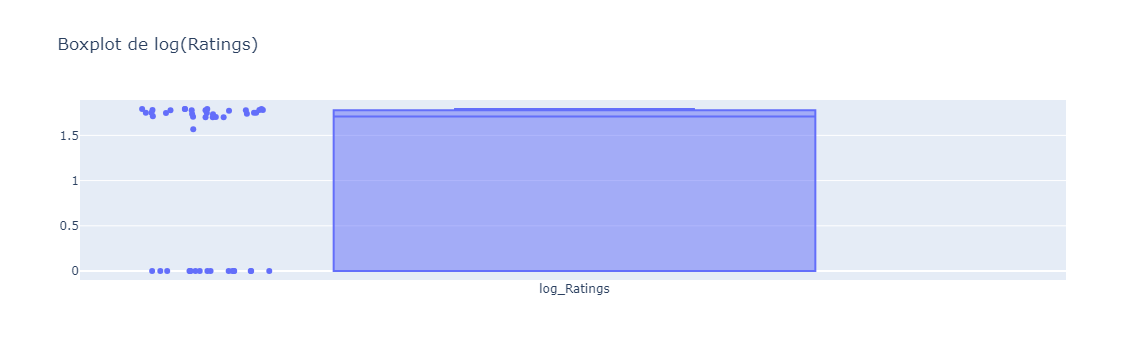

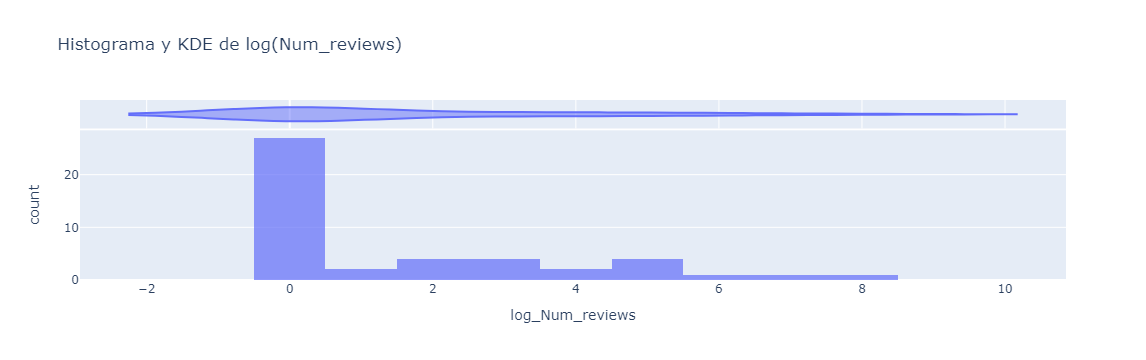

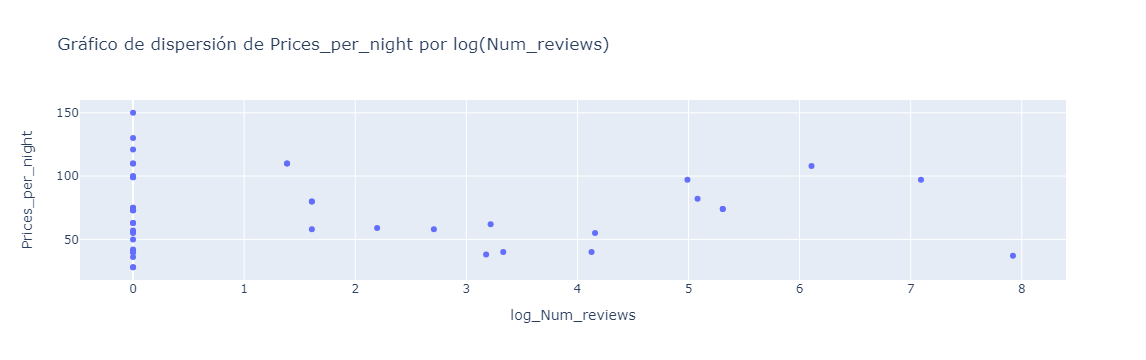

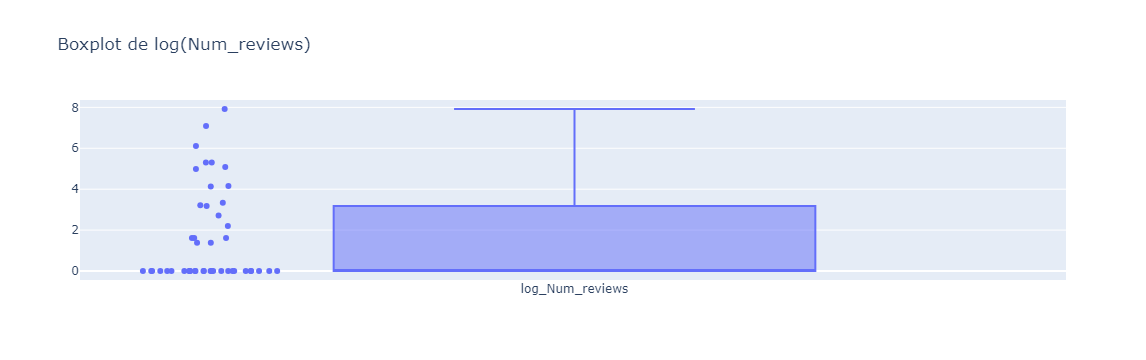

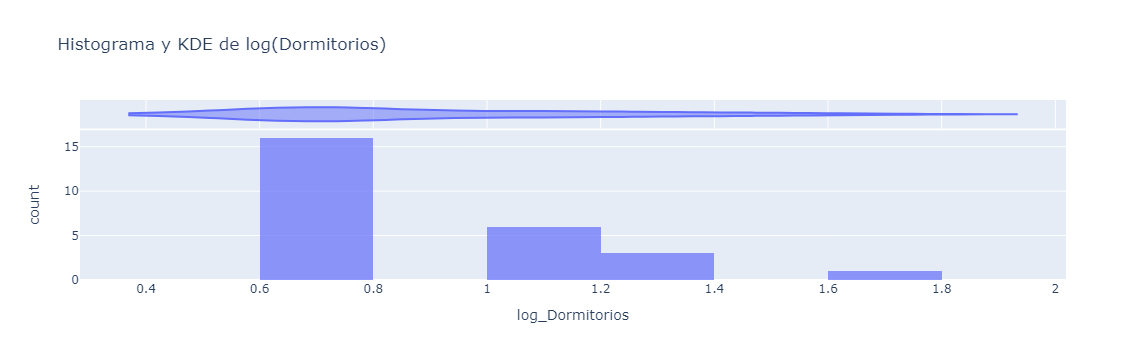

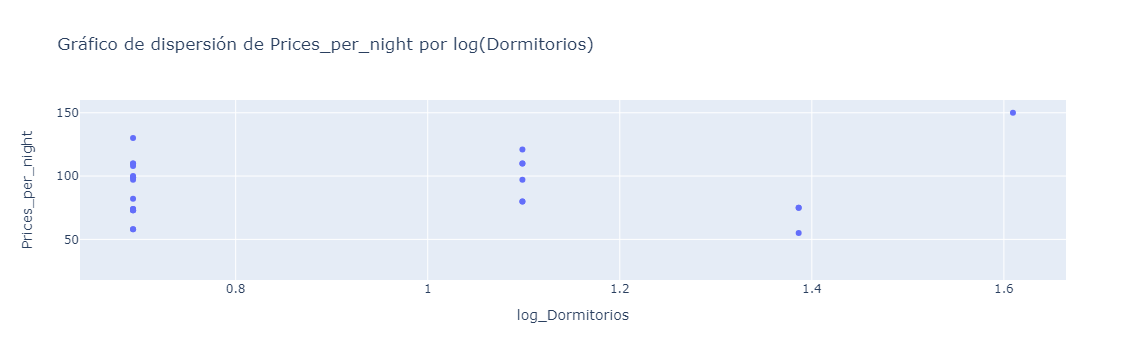

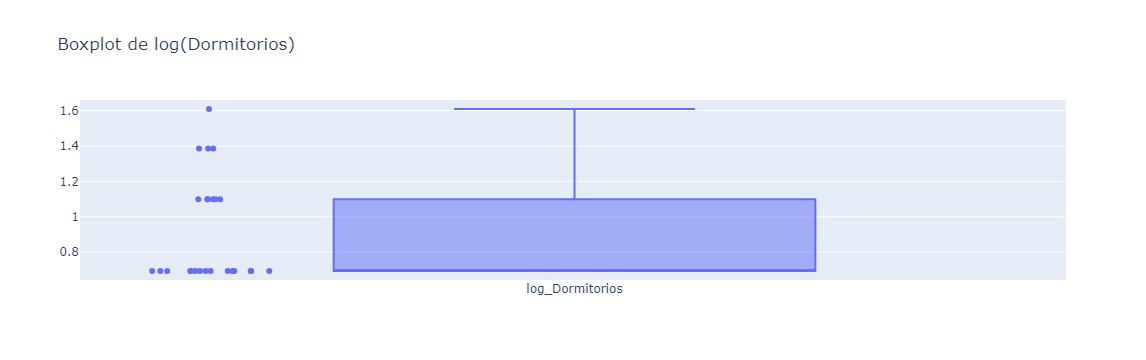

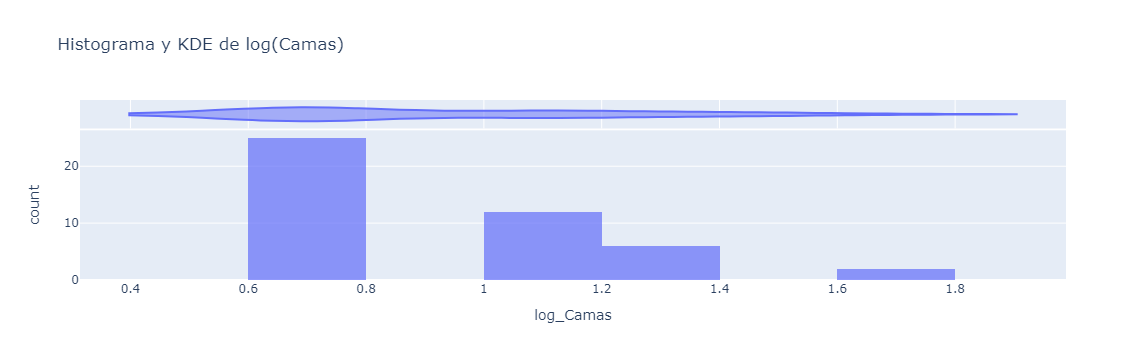

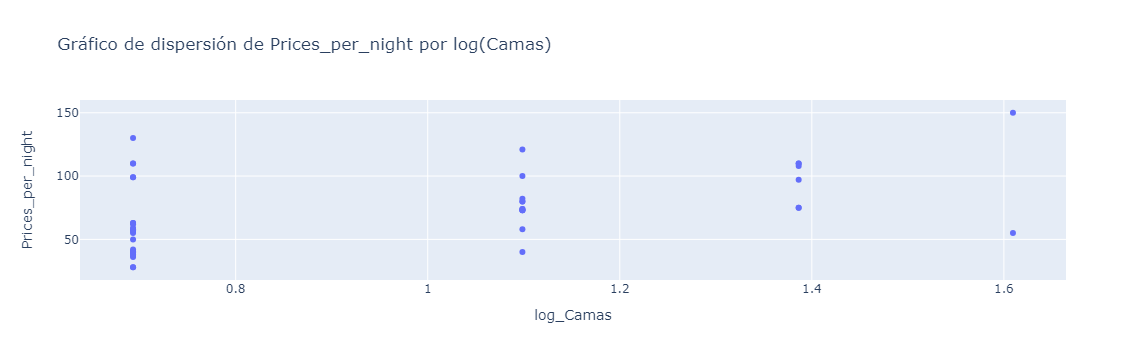

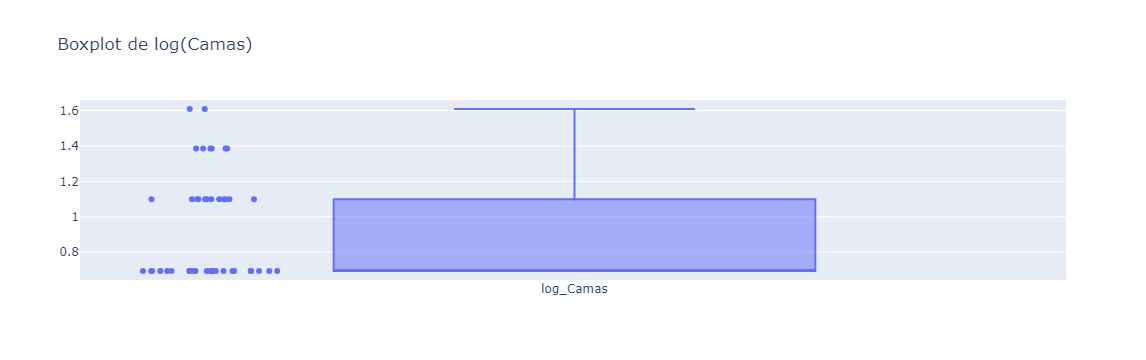

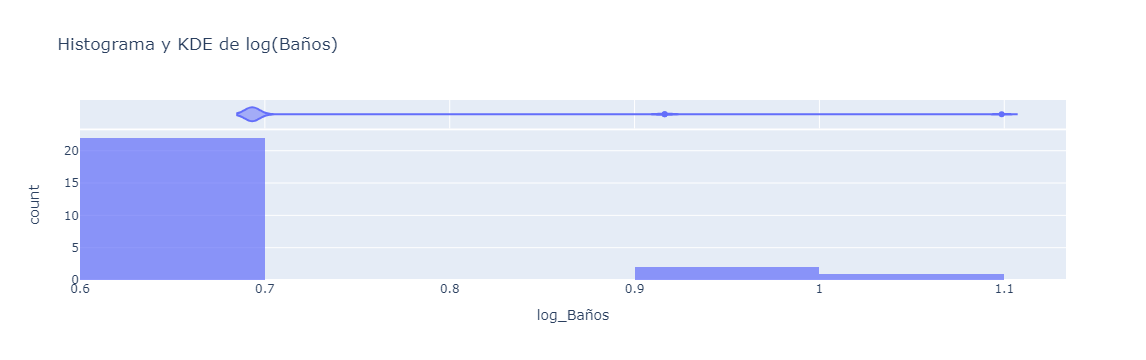

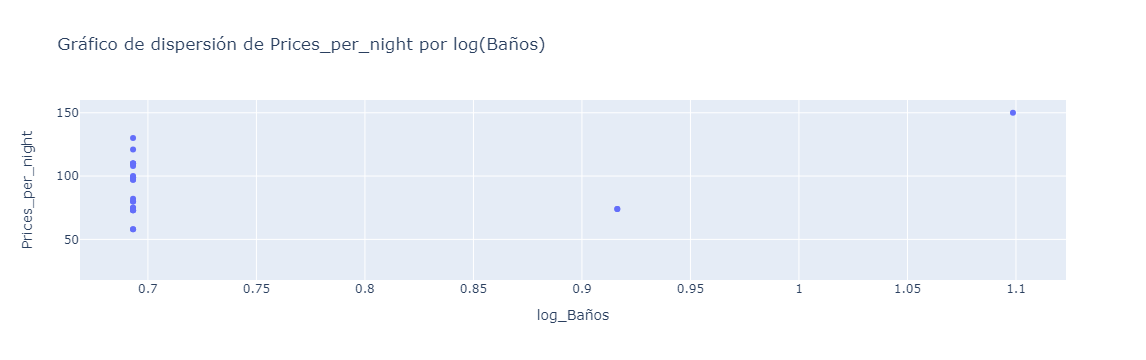

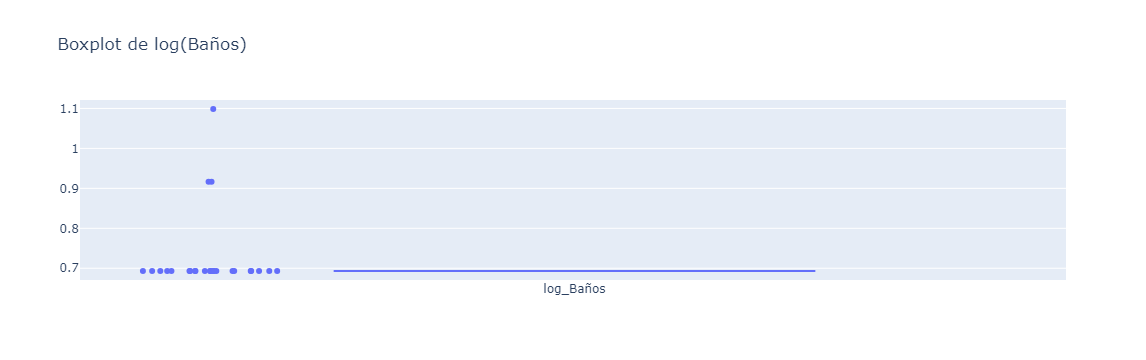

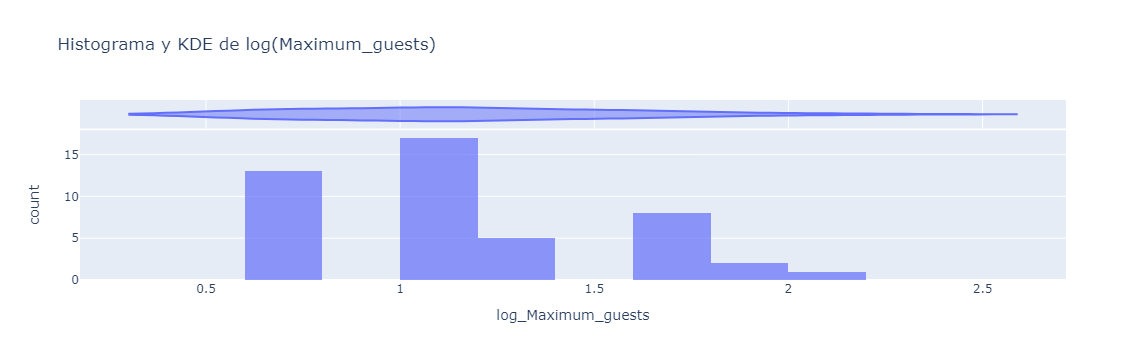

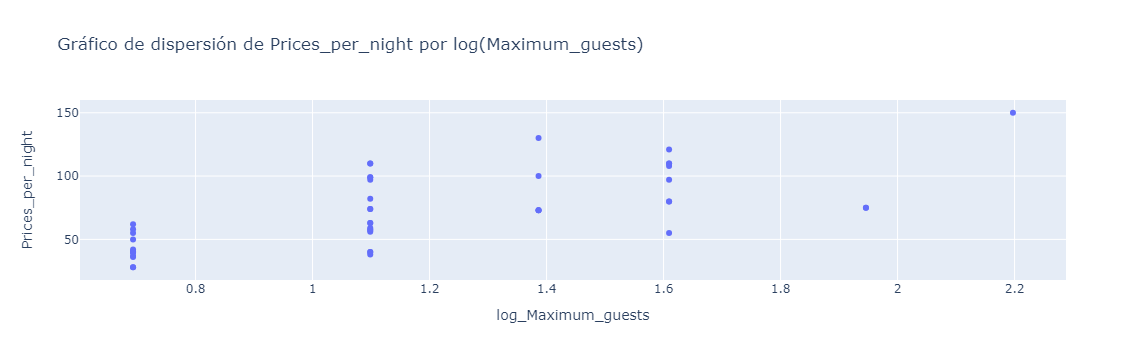

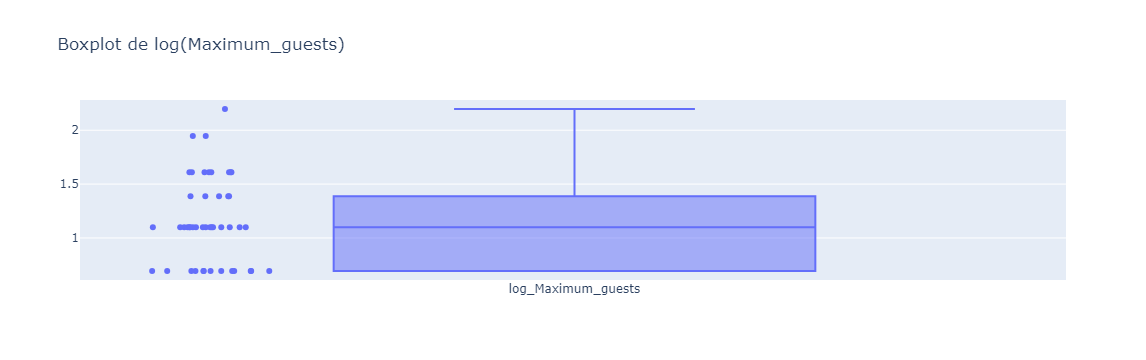

In [58]:
for columna in continuas:
    eda_continuas_log(columna = columna, df = df_filtered)

# Z_score

In [60]:
def z_score(columna, df, zl=3, zr=3):
    len_df = df.shape[0]
    
    # Calcular la media y desviación estándar
    mean = df[columna].mean()
    std = df[columna].std()
    
    # Calcular los límites izquierdo y derecho
    lim_l = mean - zl * std
    lim_r = mean + zr * std
    
    # Crear el histograma con KDE usando plotly
    hist_fig = px.histogram(df, x=columna, nbins=30, opacity=0.6, title=f"Distribución de {columna} con límites Z-score",
                            marginal="violin", histnorm="density")
    hist_fig.update_traces(marker=dict(color="lightblue"))
    
    # Añadir líneas verticales para los límites izquierdo y derecho
    hist_fig.add_vline(x=lim_l, line_width=2, line_dash="dash", line_color="orange", annotation_text="Límite Izquierdo")
    hist_fig.add_vline(x=lim_r, line_width=2, line_dash="dash", line_color="orange", annotation_text="Límite Derecho")
    
    # Mostrar el gráfico interactivo
    hist_fig.show()
    
    # Filtrar el DataFrame para valores dentro de los límites o NaNs
    df = df[df[columna].between(lim_l, lim_r) | df[columna].isna()]
    
    print(f"Filas restantes: {df.shape[0] / len_df * 100:.4}%")
    
    return df.reset_index(drop=True)

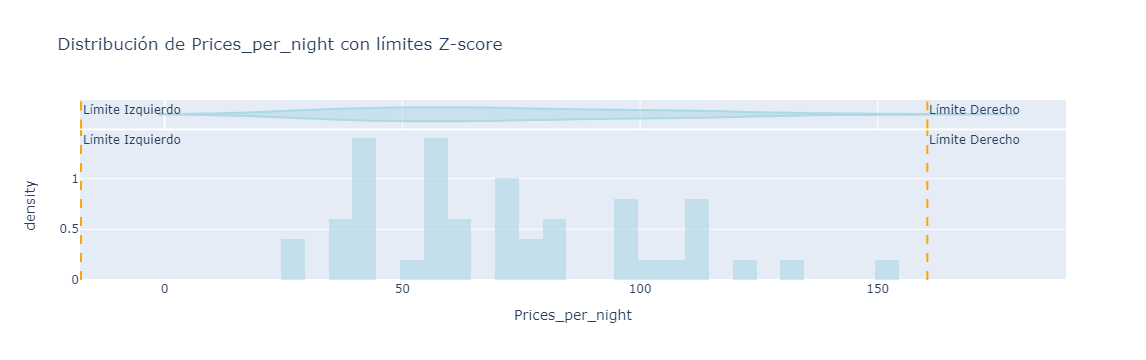

Filas restantes: 100.0%


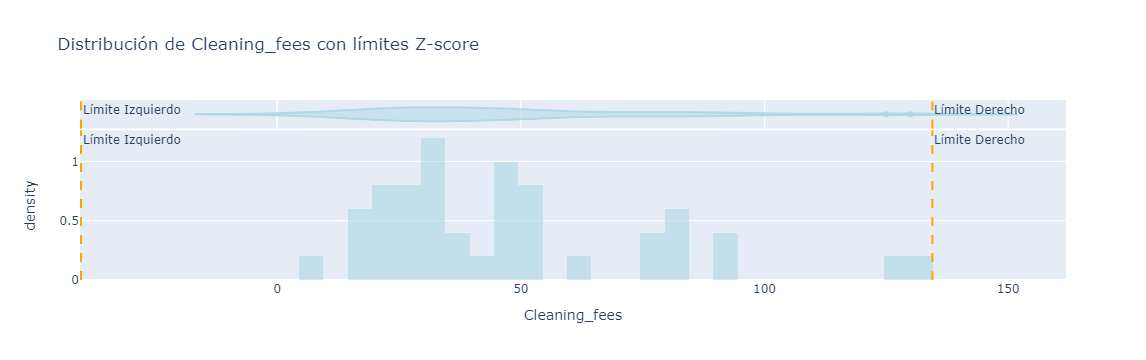

Filas restantes: 100.0%


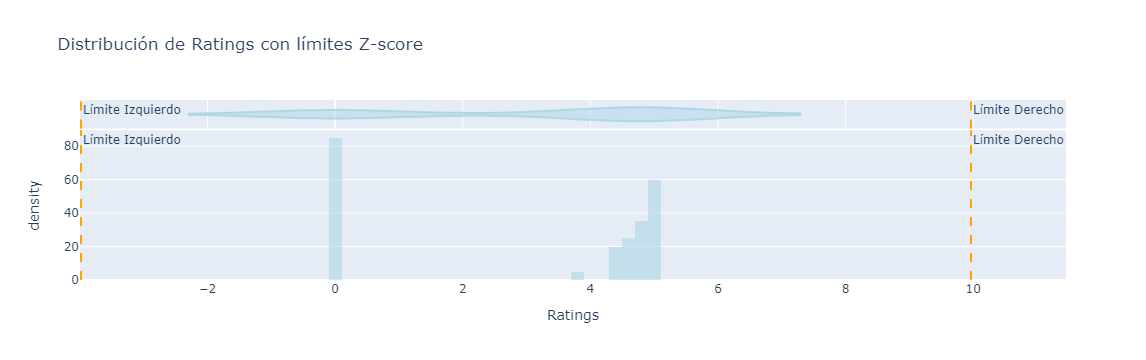

Filas restantes: 100.0%


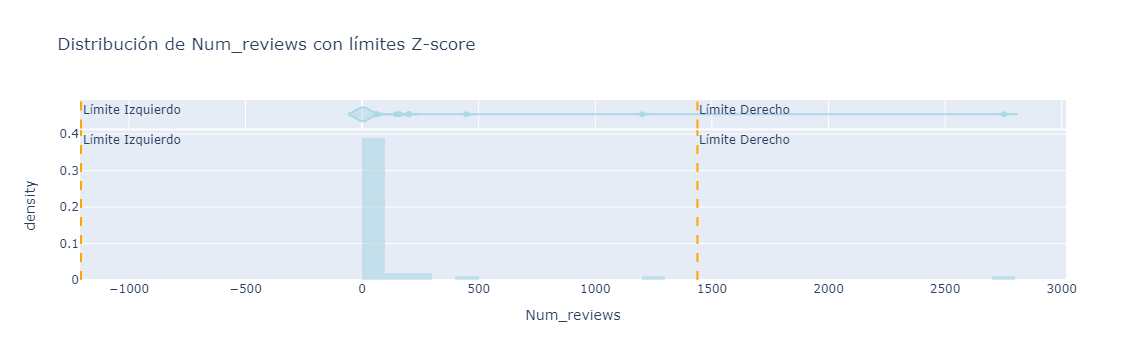

Filas restantes: 97.83%


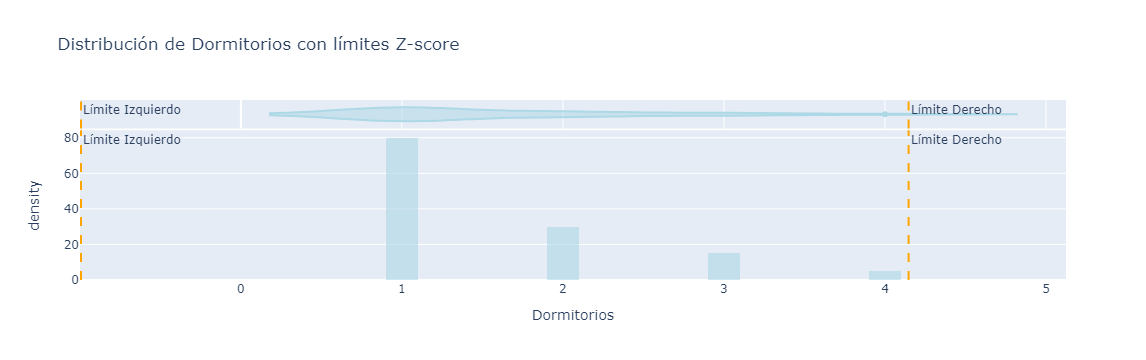

Filas restantes: 100.0%


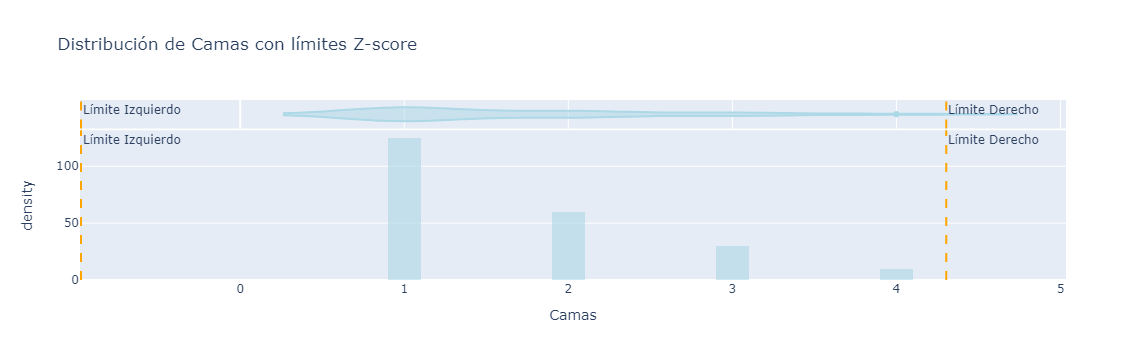

Filas restantes: 100.0%


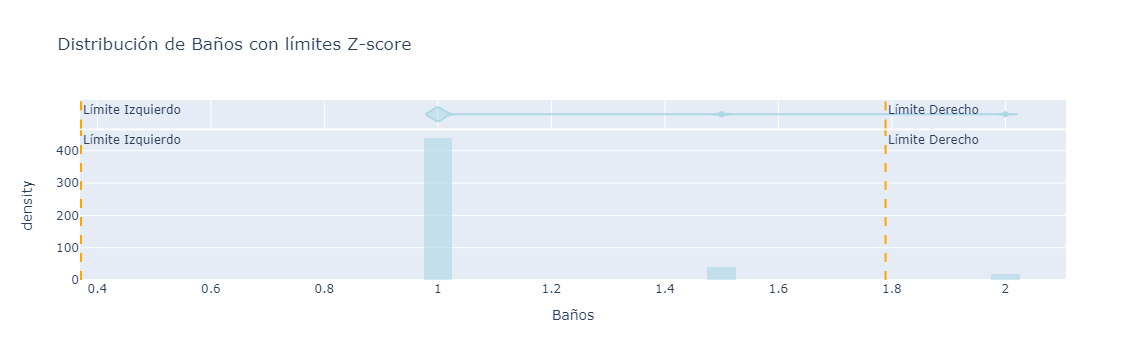

Filas restantes: 97.83%


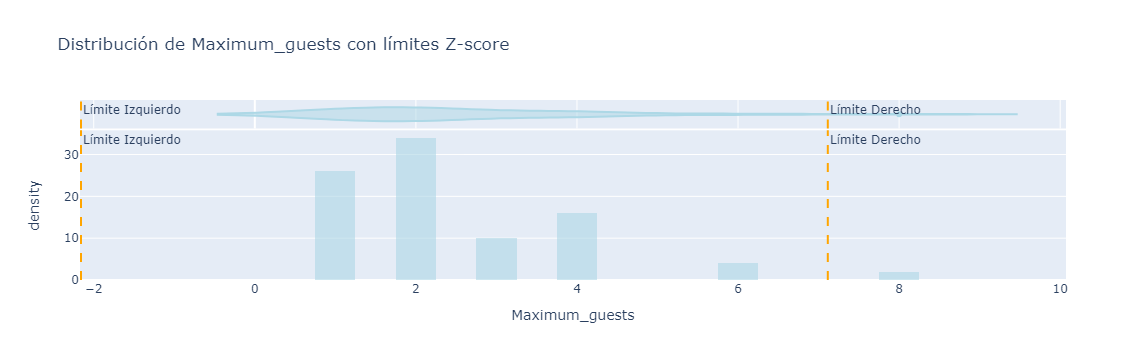

Filas restantes: 97.83%


In [61]:
for columna in continuas:
    df = z_score(columna = columna, df = df_filtered)